In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

In [2]:
methods = {"TrROS":{},"TrMRF":{},"TrROS_Hall":{},"JUSTAS":{}}

for line in open("dataset_final/raw.txt"):
    name,plddt,pae_intra,pae_inter,kc,kt = line.rstrip().split(" ")
    tmp = name.split("_")
    ID,method = "_".join(tmp[:2]),"_".join(tmp[2:])
    methods[method][ID] ={"plddt":float(plddt),
                              "intra_pae":float(pae_intra),
                              "inter_pae":float(pae_inter)}

In [3]:
data = []

# Read and process each line
for line in open("dataset_final/raw.txt"):
    name, plddt, pae_intra, pae_inter, kc, kt = line.rstrip().split(" ")
    tmp = name.split("_")
    ID, method = "_".join(tmp[:2]), "_".join(tmp[2:])
    
    # Append a row dictionary to the list
    data.append({
        "ID": ID,
        "Method": method,
        "plDDT": float(plddt),
        "PAE_Intra": float(pae_intra),
        "PAE_Inter": float(pae_inter),
        "Kc": float(kc),
        "Kt": float(kt)
    })

# Convert list to DataFrame
df_af = pd.DataFrame(data)

In [4]:
df= pd.read_csv('dataset_final/dms2_activity.csv')

In [5]:
df['Method'] =None
df.loc[df['name'].str.endswith('_TrROS'), 'Method']='TrROS'
df.loc[df['name'].str.endswith('_TrROS_Hall'), 'Method']='Joint'
df.loc[df['name'].str.endswith('_TrMRF'), 'Method']='TrMRF'
df.loc[df['name'].str.endswith('_JUSTAS'), 'Method']='ProteinMPNN'

In [6]:
suffixes = ['_TrROS', '_TrROS_Hall', '_TrMRF', '_JUSTAS']

def remove_suffix(name, suffixes):
    for suffix in suffixes:
        if name.endswith(suffix):
            return name[:-len(suffix)]  # Remove the suffix
    return name  # Return the original name if no suffix matches

# Apply the function to create the raw_name column
df['raw_name'] = df['name'].apply(lambda x: remove_suffix(x, suffixes))

In [7]:
df= df.drop_duplicates(subset='name')
df_af['name']=df_af['ID']+'_'+df_af['Method']
df= df.merge(df_af, on='name', how='left')

In [8]:
raw_name_counts = df['raw_name'].value_counts()
names_with_count_4 = raw_name_counts[raw_name_counts == 4]
num_unique_names_with_count_4 = names_with_count_4.count()
df_all_in_4 = df[df['raw_name'].isin(names_with_count_4.keys())]

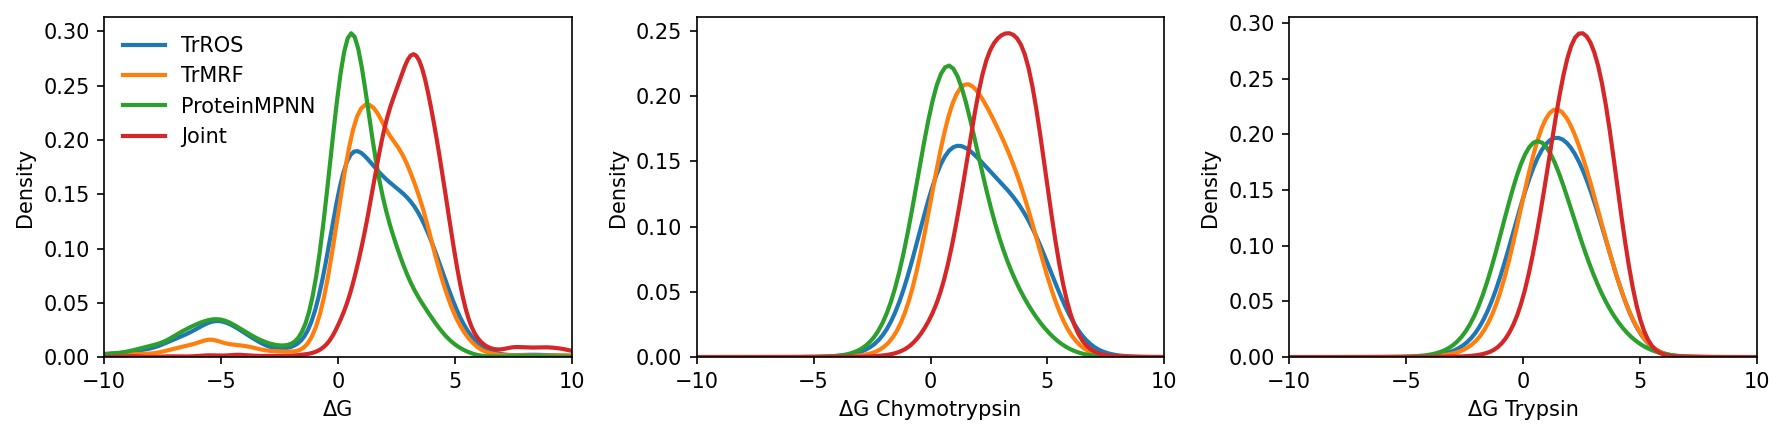

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with three subplots in a single row
fig, axs = plt.subplots(1, 3, figsize=(12, 3), dpi=150)

# Plot ΔG for general
sns.kdeplot(df[df['Method_x'] == 'TrROS']['deltaG'], label='TrROS', fill=False, linewidth=2, ax=axs[0])
sns.kdeplot(df[df['Method_x'] == 'TrMRF']['deltaG'], label='TrMRF', fill=False, linewidth=2, ax=axs[0])
sns.kdeplot(df[df['Method_x'] == 'ProteinMPNN']['deltaG'], label='ProteinMPNN', fill=False, linewidth=2, ax=axs[0])
sns.kdeplot(df[df['Method_x'] == 'Joint']['deltaG'], label='Joint', fill=False, linewidth=2, ax=axs[0])
axs[0].set_xlabel('ΔG')
axs[0].set_ylabel('Density')
axs[0].set_xlim([-10, 10])
axs[0].legend(frameon=False)

# Plot ΔG for Chymotrypsin
sns.kdeplot(df[df['Method_x'] == 'TrROS']['deltaG_c'], label='TrROS', fill=False, linewidth=2, ax=axs[1])
sns.kdeplot(df[df['Method_x'] == 'TrMRF']['deltaG_c'], label='TrMRF', fill=False, linewidth=2, ax=axs[1])
sns.kdeplot(df[df['Method_x'] == 'ProteinMPNN']['deltaG_c'], label='ProteinMPNN', fill=False, linewidth=2, ax=axs[1])
sns.kdeplot(df[df['Method_x'] == 'Joint']['deltaG_c'], label='Joint', fill=False, linewidth=2, ax=axs[1])
axs[1].set_xlabel('ΔG Chymotrypsin')
axs[1].set_ylabel('Density')
axs[1].set_xlim([-10, 10])

# Plot ΔG for Trypsin
sns.kdeplot(df[df['Method_x'] == 'TrROS']['deltaG_t'], label='TrROS', fill=False, linewidth=2, ax=axs[2])
sns.kdeplot(df[df['Method_x'] == 'TrMRF']['deltaG_t'], label='TrMRF', fill=False, linewidth=2, ax=axs[2])
sns.kdeplot(df[df['Method_x'] == 'ProteinMPNN']['deltaG_t'], label='ProteinMPNN', fill=False, linewidth=2, ax=axs[2])
sns.kdeplot(df[df['Method_x'] == 'Joint']['deltaG_t'], label='Joint', fill=False, linewidth=2, ax=axs[2])
axs[2].set_xlabel('ΔG Trypsin')
axs[2].set_ylabel('Density')
axs[2].set_xlim([-10, 10])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

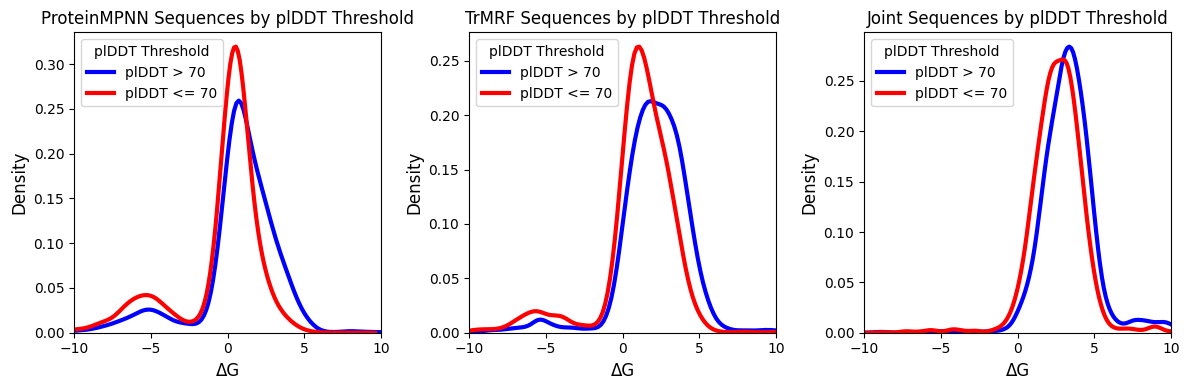

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for MPNN
df_MPNN = df[df['Method_x'] == 'ProteinMPNN']
high_plddt_MPNN = df_MPNN[df_MPNN['plDDT'] > 70]['deltaG']
low_plddt_MPNN = df_MPNN[df_MPNN['plDDT'] <= 70]['deltaG']

# Filter data for TrMRF
df_TrMRF = df[df['Method_x'] == 'TrMRF']
high_plddt_TrMRF = df_TrMRF[df_TrMRF['plDDT'] > 70]['deltaG']
low_plddt_TrMRF = df_TrMRF[df_TrMRF['plDDT'] <= 70]['deltaG']

# Filter data for TrMRF
df_Joint = df[df['Method_x'] == 'Joint']
high_plddt_Joint = df_Joint[df_Joint['plDDT'] > 70]['deltaG']
low_plddt_Joint = df_Joint[df_Joint['plDDT'] <= 70]['deltaG']


# Set up subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 4), dpi=100)

# KDE plot for MPNN
sns.kdeplot(high_plddt_MPNN, label='plDDT > 70', fill=False, linewidth=3, color='blue', ax=axs[0])
sns.kdeplot(low_plddt_MPNN, label='plDDT <= 70', fill=False, linewidth=3, color='red', ax=axs[0])
axs[0].set_xlabel('ΔG', fontsize=12)
axs[0].set_ylabel('Density', fontsize=12)
axs[0].legend(title='plDDT Threshold')
axs[0].set_title('ProteinMPNN Sequences by plDDT Threshold')
axs[0].set_xlim([-10, 10])

# KDE plot for TrMRF
sns.kdeplot(high_plddt_TrMRF, label='plDDT > 70', fill=False, linewidth=3, color='blue', ax=axs[1])
sns.kdeplot(low_plddt_TrMRF, label='plDDT <= 70', fill=False, linewidth=3, color='red', ax=axs[1])
axs[1].set_xlabel('ΔG', fontsize=12)
axs[1].set_ylabel('Density', fontsize=12)
axs[1].legend(title='plDDT Threshold')
axs[1].set_title('TrMRF Sequences by plDDT Threshold')
axs[1].set_xlim([-10, 10])


sns.kdeplot(high_plddt_Joint, label='plDDT > 70', fill=False, linewidth=3, color='blue', ax=axs[2])
sns.kdeplot(low_plddt_Joint, label='plDDT <= 70', fill=False, linewidth=3, color='red', ax=axs[2])
axs[2].set_xlabel('ΔG', fontsize=12)
axs[2].set_ylabel('Density', fontsize=12)
axs[2].legend(title='plDDT Threshold')
axs[2].set_title('Joint Sequences by plDDT Threshold')
axs[2].set_xlim([-10, 10])

# Show the plot
plt.tight_layout()
plt.show()


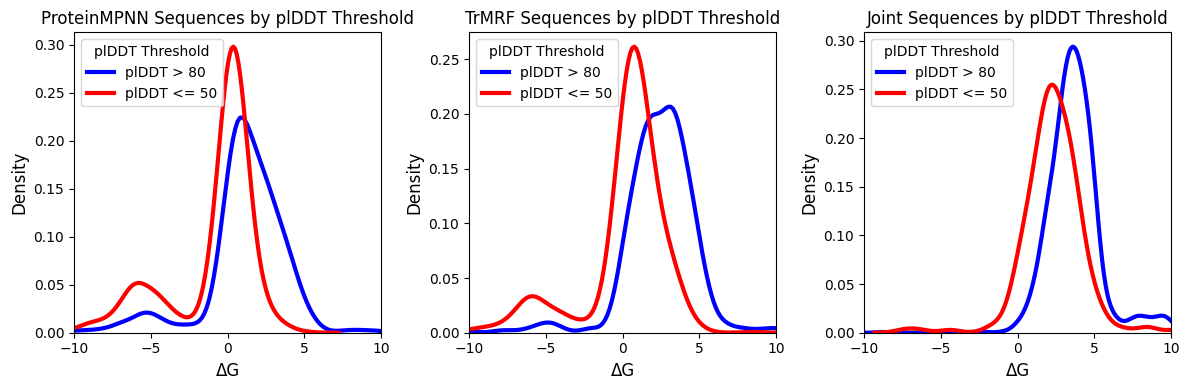

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for MPNN
df_MPNN = df[df['Method_x'] == 'ProteinMPNN']
high_plddt_MPNN = df_MPNN[df_MPNN['plDDT'] > 80]['deltaG']
low_plddt_MPNN = df_MPNN[df_MPNN['plDDT'] <= 50]['deltaG']

# Filter data for TrMRF
df_TrMRF = df[df['Method_x'] == 'TrMRF']
high_plddt_TrMRF = df_TrMRF[df_TrMRF['plDDT'] > 80]['deltaG']
low_plddt_TrMRF = df_TrMRF[df_TrMRF['plDDT'] <= 50]['deltaG']

# Filter data for TrMRF
df_Joint = df[df['Method_x'] == 'Joint']
high_plddt_Joint = df_Joint[df_Joint['plDDT'] > 80]['deltaG']
low_plddt_Joint = df_Joint[df_Joint['plDDT'] <= 50]['deltaG']


# Set up subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 4), dpi=100)

# KDE plot for MPNN
sns.kdeplot(high_plddt_MPNN, label='plDDT > 80', fill=False, linewidth=3, color='blue', ax=axs[0])
sns.kdeplot(low_plddt_MPNN, label='plDDT <= 50', fill=False, linewidth=3, color='red', ax=axs[0])
axs[0].set_xlabel('ΔG', fontsize=12)
axs[0].set_ylabel('Density', fontsize=12)
axs[0].legend(title='plDDT Threshold')
axs[0].set_title('ProteinMPNN Sequences by plDDT Threshold')
axs[0].set_xlim([-10, 10])

# KDE plot for TrMRF
sns.kdeplot(high_plddt_TrMRF, label='plDDT > 80', fill=False, linewidth=3, color='blue', ax=axs[1])
sns.kdeplot(low_plddt_TrMRF, label='plDDT <= 50', fill=False, linewidth=3, color='red', ax=axs[1])
axs[1].set_xlabel('ΔG', fontsize=12)
axs[1].set_ylabel('Density', fontsize=12)
axs[1].legend(title='plDDT Threshold')
axs[1].set_title('TrMRF Sequences by plDDT Threshold')
axs[1].set_xlim([-10, 10])


sns.kdeplot(high_plddt_Joint, label='plDDT > 80', fill=False, linewidth=3, color='blue', ax=axs[2])
sns.kdeplot(low_plddt_Joint, label='plDDT <= 50', fill=False, linewidth=3, color='red', ax=axs[2])
axs[2].set_xlabel('ΔG', fontsize=12)
axs[2].set_ylabel('Density', fontsize=12)
axs[2].legend(title='plDDT Threshold')
axs[2].set_title('Joint Sequences by plDDT Threshold')
axs[2].set_xlim([-10, 10])

# Show the plot
plt.tight_layout()
plt.show()

(array([4.0000e+00, 1.3000e+01, 4.2000e+01, 1.2900e+02, 3.6100e+02,
        1.0340e+03, 1.6120e+03, 7.5800e+02, 7.1600e+02, 9.5380e+03,
        1.2808e+04, 9.6250e+03, 3.5010e+03, 3.1600e+02, 1.7200e+02,
        1.3000e+02, 2.7000e+01, 1.1000e+01, 0.0000e+00, 1.0000e+00]),
 array([-15.6997324 , -14.0570045 , -12.4142766 , -10.7715487 ,
         -9.1288208 ,  -7.4860929 ,  -5.843365  ,  -4.2006371 ,
         -2.5579092 ,  -0.91518131,   0.72754659,   2.37027449,
          4.01300239,   5.65573029,   7.29845819,   8.94118609,
         10.58391399,  12.22664189,  13.86936978,  15.51209768,
         17.15482558]),
 <BarContainer object of 20 artists>)

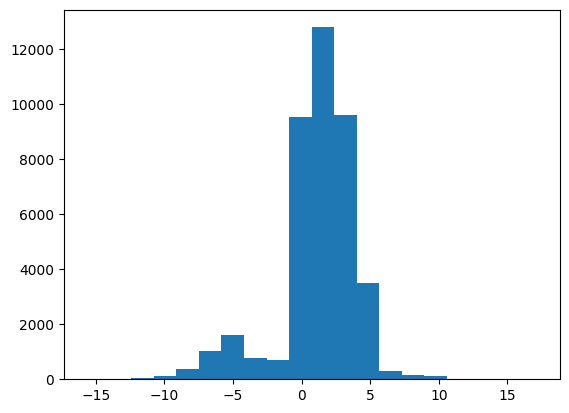

In [12]:
plt.hist(df['deltaG'], bins=20)

In [13]:
# Calculate and print median values for MPNN
median_high_MPNN = high_plddt_MPNN.median()
median_low_MPNN = low_plddt_MPNN.median()

print(f'MPNN High plDDT (plDDT > 80) Median ΔG: {median_high_MPNN}')
print(f'MPNN Low plDDT (plDDT <= 50) Median ΔG: {median_low_MPNN}')

# Calculate and print median values for TrMRF
median_high_TrMRF = high_plddt_TrMRF.median()
median_low_TrMRF = low_plddt_TrMRF.median()

print(f'TrMRF High plDDT (plDDT > 80) Median ΔG: {median_high_TrMRF}')
print(f'TrMRF Low plDDT (plDDT <= 50) Median ΔG: {median_low_TrMRF}')

# Calculate and print median values for Joint
median_high_Joint = high_plddt_Joint.median()
median_low_Joint = low_plddt_Joint.median()

print(f'Joint High plDDT (plDDT > 80) Median ΔG: {median_high_Joint}')
print(f'Joint Low plDDT (plDDT <= 50) Median ΔG: {median_low_Joint}')


MPNN High plDDT (plDDT > 80) Median ΔG: 1.3173869174064554
MPNN Low plDDT (plDDT <= 50) Median ΔG: 0.14929067558777315
TrMRF High plDDT (plDDT > 80) Median ΔG: 2.56373998766776
TrMRF Low plDDT (plDDT <= 50) Median ΔG: 0.7280632652363495
Joint High plDDT (plDDT > 80) Median ΔG: 3.6112720987573184
Joint Low plDDT (plDDT <= 50) Median ΔG: 2.314042744854639


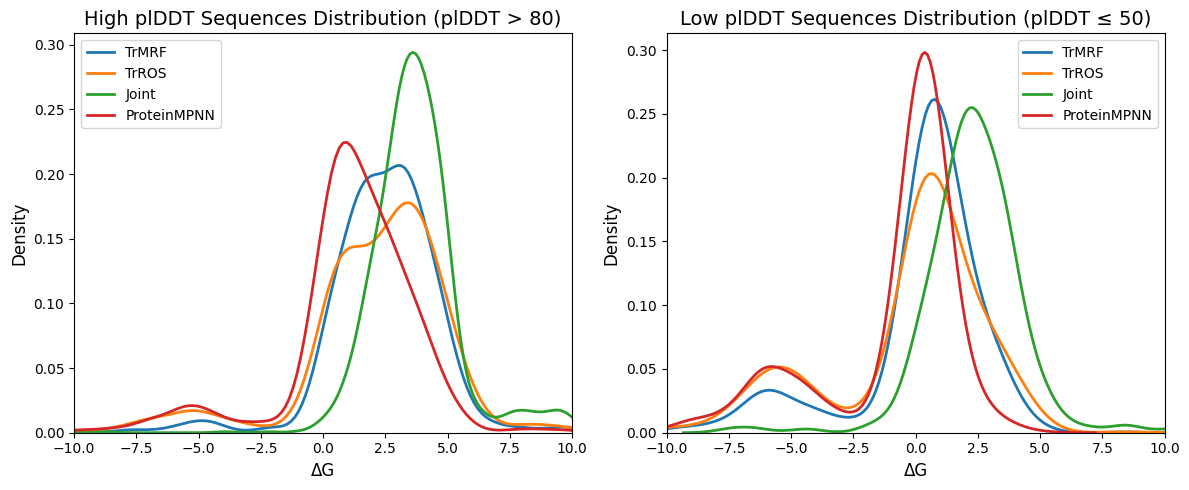

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is already defined and contains 'Method_x', 'plDDT', and 'deltaG'

# Filter data for high and low plDDT for all methods
high_plddt = df[df['plDDT'] > 80]
low_plddt = df[df['plDDT'] <= 50]

# Set up the figure
plt.figure(figsize=(12, 5), dpi=100)

# KDE plot for high plDDT values (merged for all methods)
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
for method in ['TrMRF', 'TrROS', 'Joint', 'ProteinMPNN']:
    sns.kdeplot(high_plddt[high_plddt['Method_x'] == method]['deltaG'], 
                label=method, fill=False, linewidth=2)

plt.xlabel('ΔG', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('High plDDT Sequences Distribution (plDDT > 80)', fontsize=14)
plt.xlim([-10, 10])
plt.legend()

# KDE plot for low plDDT values (merged for all methods)
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
for method in ['TrMRF', 'TrROS', 'Joint', 'ProteinMPNN']:
    sns.kdeplot(low_plddt[low_plddt['Method_x'] == method]['deltaG'], 
                label=method, fill=False, linewidth=2)

plt.xlabel('ΔG', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Low plDDT Sequences Distribution (plDDT ≤ 50)', fontsize=14)
plt.xlim([-10, 10])
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


Spearman correlation coefficient: 0.300


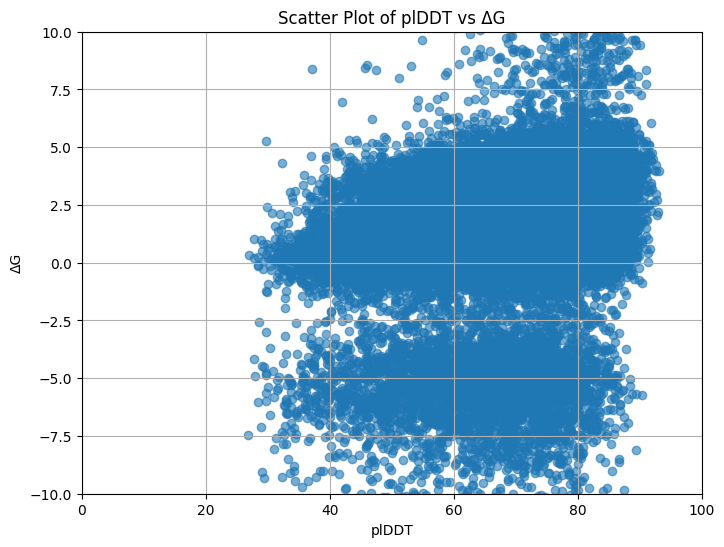

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['plDDT'], df['deltaG'], alpha=0.6)
plt.title('Scatter Plot of plDDT vs ΔG')
plt.xlabel('plDDT')
plt.ylabel('ΔG')
plt.xlim([0, 100])  # Assuming plDDT is a percentage from 0 to 100
plt.ylim([-10, 10])  # Adjust based on your deltaG range
plt.grid(True)

# Calculate Spearman correlation
spearman_corr, p_value = spearmanr(df['plDDT'], df['deltaG'], nan_policy='omit')
print(f'Spearman correlation coefficient: {spearman_corr:.3f}')
plt.show()


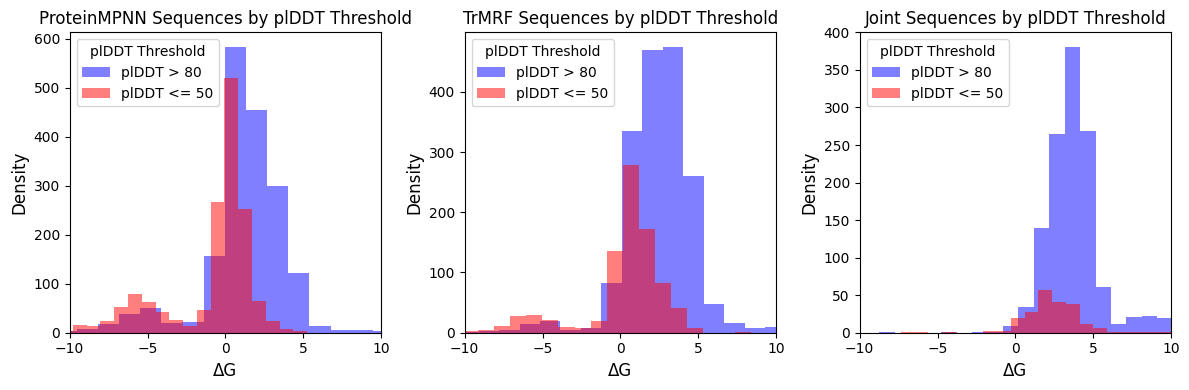

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for MPNN
df_MPNN = df[df['Method_x'] == 'ProteinMPNN']
high_plddt_MPNN = df_MPNN[df_MPNN['plDDT'] > 80]['deltaG']
low_plddt_MPNN = df_MPNN[df_MPNN['plDDT'] <= 50]['deltaG']

# Filter data for TrMRF
df_TrMRF = df[df['Method_x'] == 'TrMRF']
high_plddt_TrMRF = df_TrMRF[df_TrMRF['plDDT'] > 80]['deltaG']
low_plddt_TrMRF = df_TrMRF[df_TrMRF['plDDT'] <= 50]['deltaG']

# Filter data for Joint
df_Joint = df[df['Method_x'] == 'Joint']
high_plddt_Joint = df_Joint[df_Joint['plDDT'] > 80]['deltaG']
low_plddt_Joint = df_Joint[df_Joint['plDDT'] <= 50]['deltaG']

# Set up subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 4), dpi=100)

# Histogram for MPNN
axs[0].hist(high_plddt_MPNN, bins=20, alpha=0.5, color='blue', label='plDDT > 80')
axs[0].hist(low_plddt_MPNN, bins=20, alpha=0.5, color='red', label='plDDT <= 50')
axs[0].set_xlabel('ΔG', fontsize=12)
axs[0].set_ylabel('Density', fontsize=12)
axs[0].legend(title='plDDT Threshold')
axs[0].set_title('ProteinMPNN Sequences by plDDT Threshold')
axs[0].set_xlim([-10, 10])

# Histogram for TrMRF
axs[1].hist(high_plddt_TrMRF, bins=20, alpha=0.5, color='blue', label='plDDT > 80')
axs[1].hist(low_plddt_TrMRF, bins=20, alpha=0.5, color='red', label='plDDT <= 50')
axs[1].set_xlabel('ΔG', fontsize=12)
axs[1].set_ylabel('Density', fontsize=12)
axs[1].legend(title='plDDT Threshold')
axs[1].set_title('TrMRF Sequences by plDDT Threshold')
axs[1].set_xlim([-10, 10])

# Histogram for Joint
axs[2].hist(high_plddt_Joint, bins=20, alpha=0.5, color='blue', label='plDDT > 80')
axs[2].hist(low_plddt_Joint, bins=20, alpha=0.5, color='red', label='plDDT <= 50')
axs[2].set_xlabel('ΔG', fontsize=12)
axs[2].set_ylabel('Density', fontsize=12)
axs[2].legend(title='plDDT Threshold')
axs[2].set_title('Joint Sequences by plDDT Threshold')
axs[2].set_xlim([-10, 10])

# Show the plot
plt.tight_layout()
plt.show()


In [17]:
np.median(df[~df['plDDT'].isna()]['plDDT'])

70.01989592161154

(array([  35.,   99.,  199.,  404.,  561.,  882., 1130., 1486., 1914.,
        2370., 2983., 3465., 3883., 4489., 4587., 4308., 3496., 2042.,
         766.,  111.]),
 array([26.81306605, 30.12546101, 33.43785596, 36.75025092, 40.06264587,
        43.37504083, 46.68743578, 49.99983074, 53.3122257 , 56.62462065,
        59.93701561, 63.24941056, 66.56180552, 69.87420047, 73.18659543,
        76.49899039, 79.81138534, 83.1237803 , 86.43617525, 89.74857021,
        93.06096516]),
 <BarContainer object of 20 artists>)

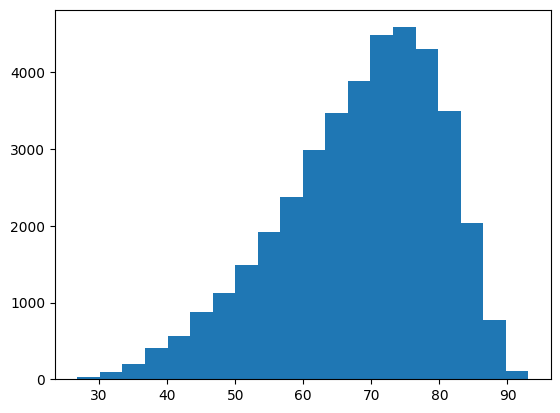

In [18]:
plt.hist(df['plDDT'], bins = 20)

## 1. All 4 Models Sequences (inter-PAE  > 15) and clip dG to be -1 to 6

In [19]:
import csv

methods = {"TrROS": {}, "TrMRF": {}, "TrROS_Hall": {}, "JUSTAS": {}}

with open("dataset_final/all_4.csv", "r") as csvfile:
    reader = csv.reader(csvfile)
    header = next(reader)  # Skip the header

    for row in reader:
        name, sequence, Full_PLDDT, half_masked_PLDDT, max_PLDDT, avg_PLDDT, esm_score, AF_plddt, inter_pae, k_T_1, k_T_95CI, k_C_1, k_C_95CI, deltaG_t, deltaG_t_95CI, deltaG_c, deltaG_c_95CI, deltaG, deltaG_95CI ,unconditional_CE, conditional_CE, Hybrid_composite_score= row 
        tmp = name.split("_")
        ID, method = "_".join(tmp[:2]), "_".join(tmp[2:])
        
        if method in methods:  # Check if the method exists in the dictionary

            methods[method][ID] = {
                "k_T": float(k_T_1),
                "k_C": float(k_C_1),
                "deltaG_t": float(deltaG_t),
                "deltaG_c": float(deltaG_c),
                "deltaG": float(deltaG),
                "plddt": float(AF_plddt),
                "inter_pae": float(inter_pae),
                "Hybrid_composite_score": float(Hybrid_composite_score),
                  
            }

In [20]:
shared = {}
for method in ["TrROS","TrMRF","TrROS_Hall","JUSTAS"]: #methods.keys():
  for ID in methods[method].keys():
    if ID in shared: shared[ID] += 1
    else: shared[ID] = 1

In [21]:
_TrROS_TrMRF = []
_TrMRF = []
_TrROS = []
_MPNN = []
_NAME = []
for ID,num in shared.items():
    
    if methods["TrROS"][ID]["inter_pae"] > 15.0 \
    and methods["TrMRF"][ID]["inter_pae"] > 15.0 \
    and methods["TrROS_Hall"][ID]["inter_pae"] > 15.0 \
    and methods["JUSTAS"][ID]["inter_pae"] > 15.0:


        _TrROS_TrMRF.append([methods["TrROS_Hall"][ID]["k_T"],
                           methods["TrROS_Hall"][ID]["k_C"],
                           methods["TrROS_Hall"][ID]["deltaG_t"],
                           methods["TrROS_Hall"][ID]["deltaG_c"],
                           methods["TrROS_Hall"][ID]["deltaG"],
                           methods["TrROS_Hall"][ID]["Hybrid_composite_score"],
                           methods["TrROS_Hall"][ID]["inter_pae"],
                           methods["TrROS_Hall"][ID]["plddt"]])
        _TrMRF.append([methods["TrMRF"][ID]["k_T"],
                     methods["TrMRF"][ID]["k_C"],
                     methods["TrMRF"][ID]["deltaG_t"],
                     methods["TrMRF"][ID]["deltaG_c"],
                     methods["TrMRF"][ID]["deltaG"],
                     methods["TrMRF"][ID]["Hybrid_composite_score"],
                     methods["TrMRF"][ID]["inter_pae"],
                     methods["TrMRF"][ID]["plddt"]])
        _TrROS.append([methods["TrROS"][ID]["k_T"],
                     methods["TrROS"][ID]["k_C"],
                     methods["TrROS"][ID]["deltaG_t"],
                     methods["TrROS"][ID]["deltaG_c"],
                     methods["TrROS"][ID]["deltaG"],
                     methods["TrROS"][ID]["Hybrid_composite_score"],
                     methods["TrROS"][ID]["inter_pae"],
                     methods["TrROS"][ID]["plddt"]])
        _MPNN.append([methods["JUSTAS"][ID]["k_T"],
                     methods["JUSTAS"][ID]["k_C"],
                     methods["JUSTAS"][ID]["deltaG_t"],
                     methods["JUSTAS"][ID]["deltaG_c"],
                     methods["JUSTAS"][ID]["deltaG"],
                     methods["JUSTAS"][ID]["Hybrid_composite_score"],
                     methods["JUSTAS"][ID]["inter_pae"],
                     methods["JUSTAS"][ID]["plddt"]])
        _NAME.append(ID)

_TrROS_TrMRF = np.array(_TrROS_TrMRF)
_TrMRF = np.array(_TrMRF)
_TrROS = np.array(_TrROS)
_MPNN = np.array(_MPNN)

_TrROS_TrMRF[:, 4] = np.clip(_TrROS_TrMRF[:, 4], -1, 6)  # Assuming deltaG is at index 4
_TrMRF[:, 4] = np.clip(_TrMRF[:, 4], -1, 6)
_TrROS[:, 4] = np.clip(_TrROS[:, 4], -1, 6)
_MPNN[:, 4] = np.clip(_MPNN[:, 4], -1, 6)

In [22]:
len(_TrROS_TrMRF[:, 4])*4

5708

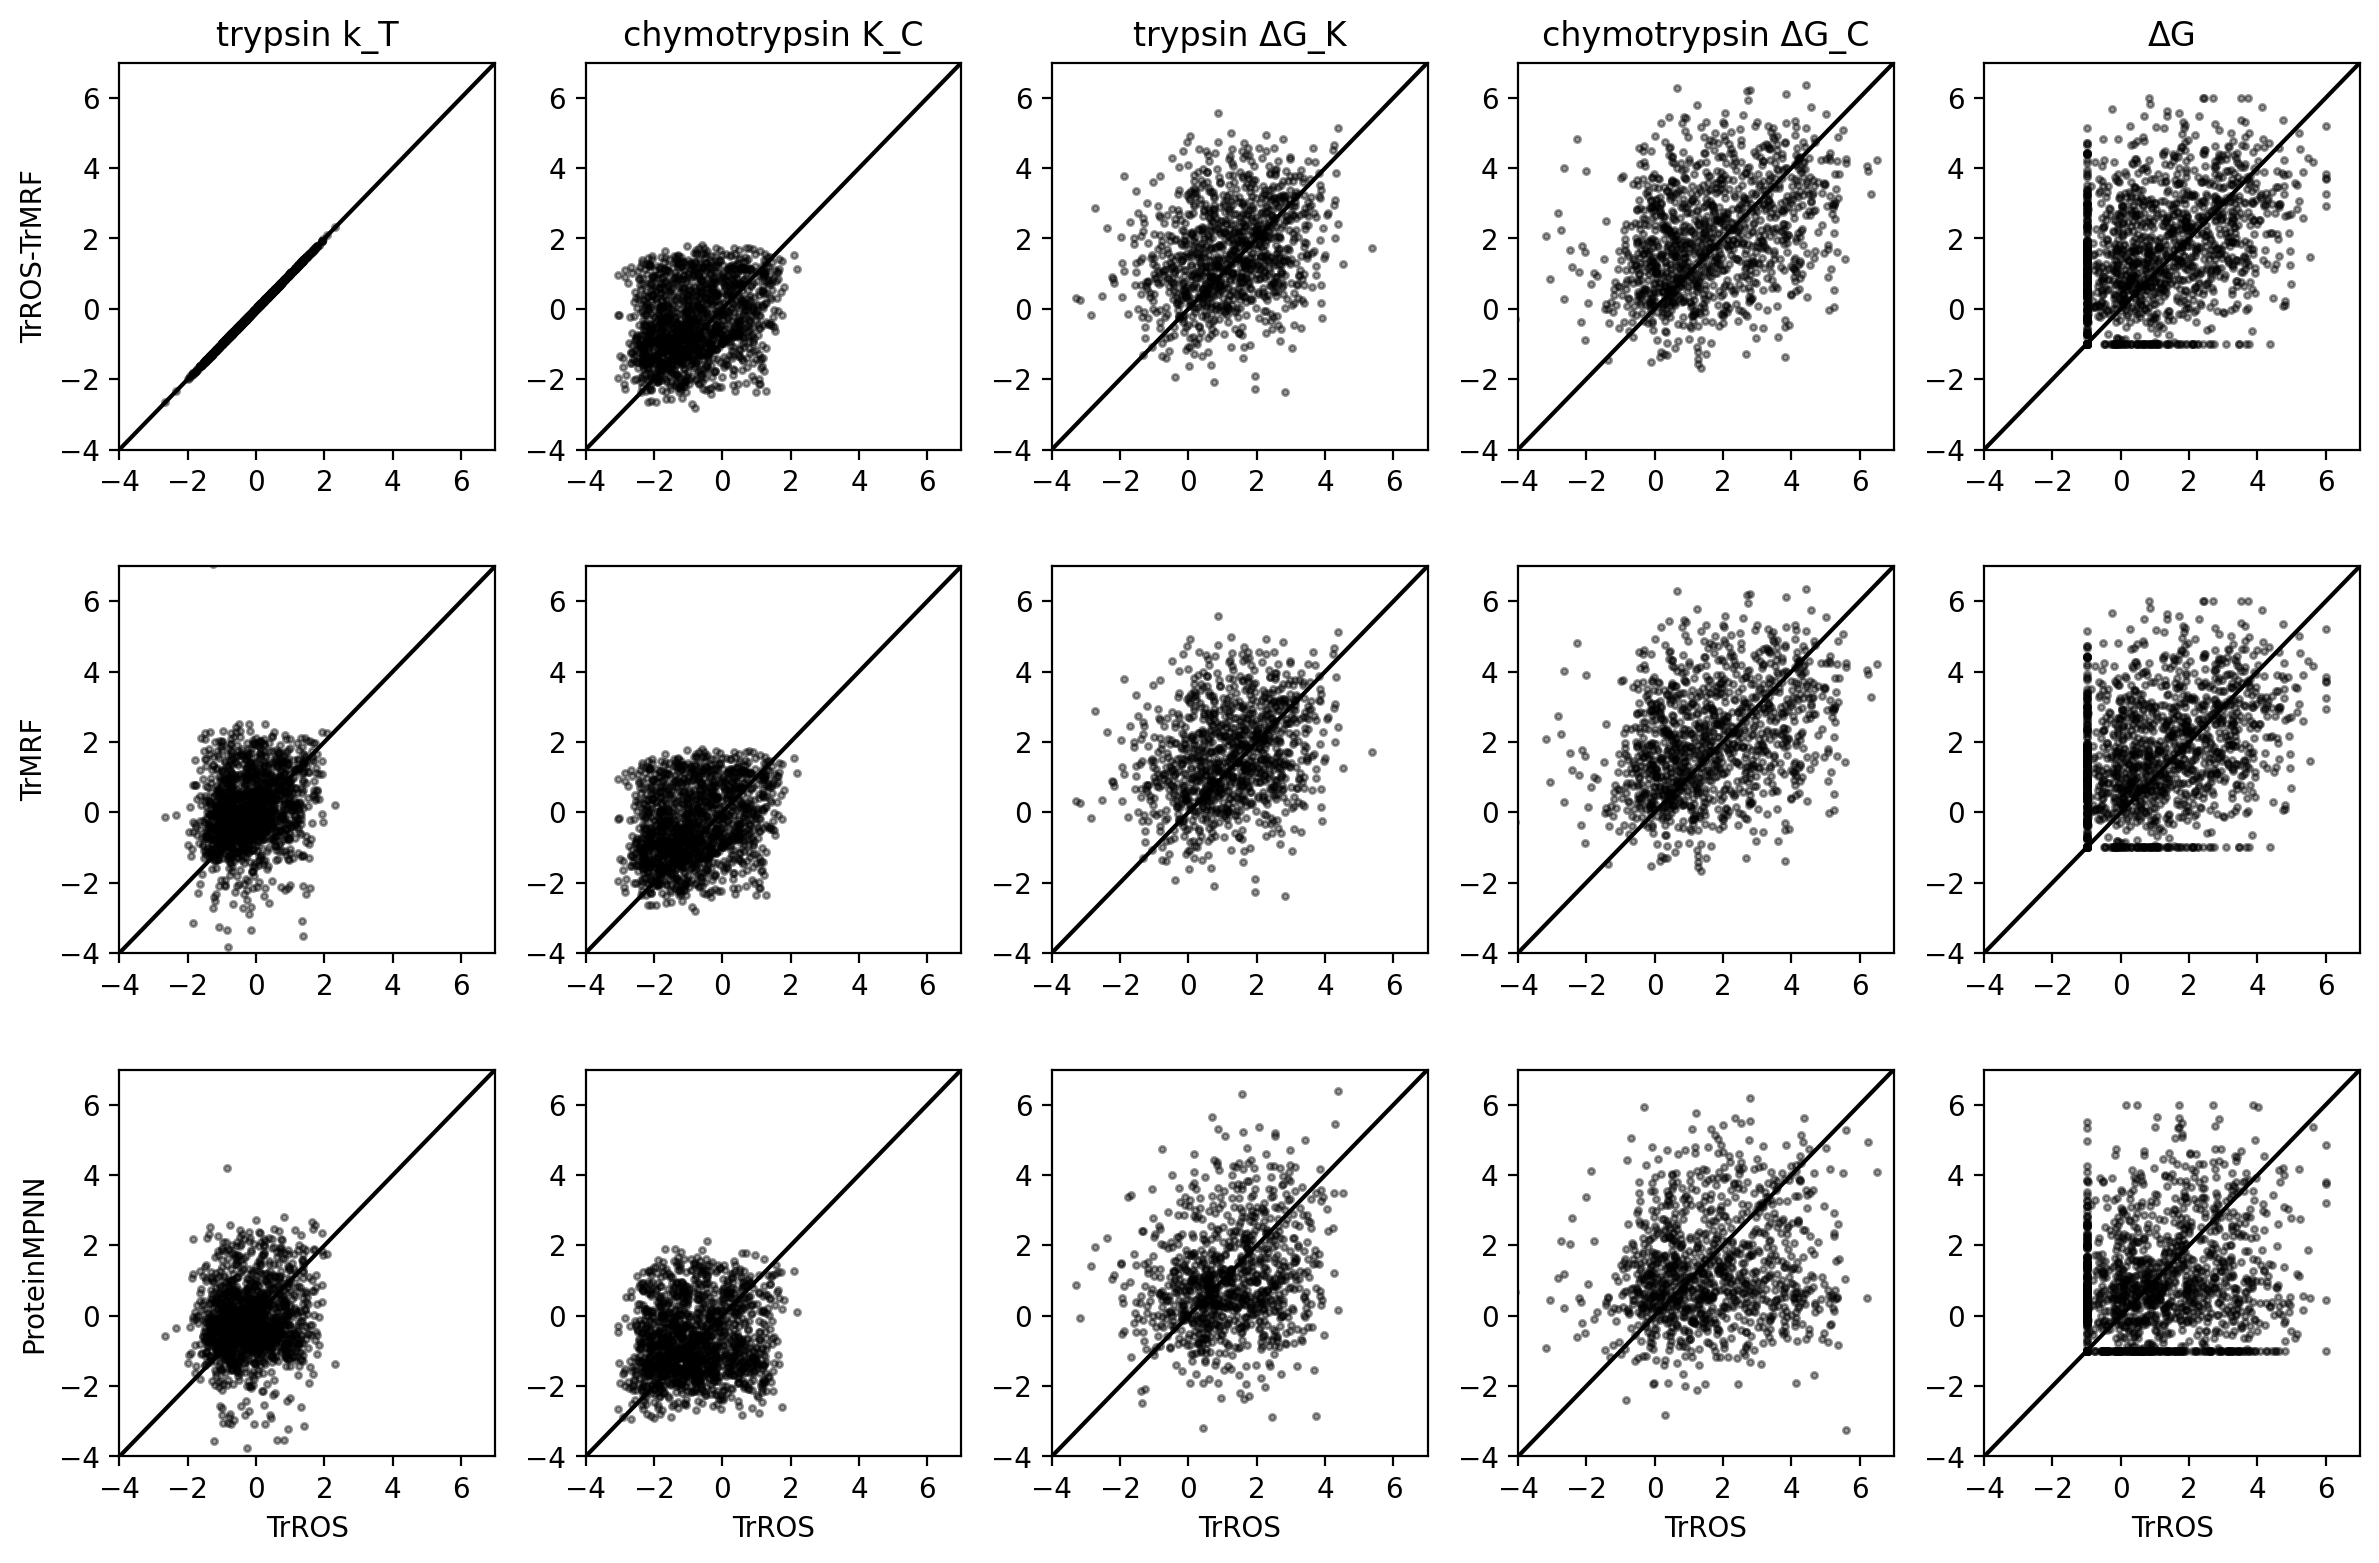

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Create the figure with specified size and DPI
plt.figure(figsize=(12, 10), dpi=200)

# First row of subplots
plt.subplot(4, 5, 1)
plt.title("trypsin k_T")
plt.scatter(_TrROS[:, 0], _TrROS[:, 0], color="black", alpha=0.4, s=5)  # Using s=5
plt.xlim(-4, 7)
plt.ylim(-4, 7)
plt.ylabel("TrROS-TrMRF")
plt.plot([-4, 7], [-4, 7], color="black")
plt.xticks(np.arange(-4, 8, 2))  # Set x-axis ticks with a gap of 2
plt.yticks(np.arange(-4, 8, 2))  # Set y-axis ticks with a gap of 2

plt.subplot(4, 5, 2)
plt.title("chymotrypsin K_C")
plt.scatter(_TrROS[:, 1], _TrMRF[:, 1], color="black", alpha=0.4, s=5)
plt.xlim(-4, 7)
plt.ylim(-4, 7)
plt.plot([-4, 7], [-4, 7], color="black")
plt.xticks(np.arange(-4, 8, 2))  # Set x-axis ticks
plt.yticks(np.arange(-4, 8, 2))  # Set y-axis ticks

plt.subplot(4, 5, 3)
plt.title("trypsin ΔG_K")
plt.scatter(_TrROS[:, 2], _TrMRF[:, 2], color="black", alpha=0.4, s=5)
plt.xlim(-4, 7)
plt.ylim(-4, 7)
plt.plot([-4, 7], [-4, 7], color="black")
plt.xticks(np.arange(-4, 8, 2))  # Set x-axis ticks
plt.yticks(np.arange(-4, 8, 2))  # Set y-axis ticks

plt.subplot(4, 5, 4)
plt.title("chymotrypsin ΔG_C")
plt.scatter(_TrROS[:, 3], _TrMRF[:, 3], color="black", alpha=0.4, s=5)
plt.xlim(-4, 7)
plt.ylim(-4, 7)
plt.plot([-4, 7], [-4, 7], color="black")
plt.xticks(np.arange(-4, 8, 2))  # Set x-axis ticks
plt.yticks(np.arange(-4, 8, 2))  # Set y-axis ticks

plt.subplot(4, 5, 5)
plt.title("ΔG")
plt.scatter(_TrROS[:, 4], _TrMRF[:, 4], color="black", alpha=0.4, s=5)
plt.xlim(-4, 7)
plt.ylim(-4, 7)
plt.plot([-4, 7], [-4, 7], color="black")
plt.xticks(np.arange(-4, 8, 2))  # Set x-axis ticks
plt.yticks(np.arange(-4, 8, 2))  # Set y-axis ticks

# Second row of subplots
plt.subplot(4, 5, 6)
plt.scatter(_TrROS[:, 0], _TrMRF[:, 0], color="black", alpha=0.4, s=5)
plt.xlim(-4, 7)
plt.ylim(-4, 7)
plt.ylabel("TrMRF")
plt.plot([-4, 7], [-4, 7], color="black")
plt.xticks(np.arange(-4, 8, 2))  # Set x-axis ticks
plt.yticks(np.arange(-4, 8, 2))  # Set y-axis ticks

plt.subplot(4, 5, 7)
plt.scatter(_TrROS[:, 1], _TrMRF[:, 1], color="black", alpha=0.4, s=5)
plt.xlim(-4, 7)
plt.ylim(-4, 7)
plt.plot([-4, 7], [-4, 7], color="black")
plt.xticks(np.arange(-4, 8, 2))  # Set x-axis ticks
plt.yticks(np.arange(-4, 8, 2))  # Set y-axis ticks

plt.subplot(4, 5, 8)
plt.scatter(_TrROS[:, 2], _TrMRF[:, 2], color="black", alpha=0.4, s=5)
plt.xlim(-4, 7)
plt.ylim(-4, 7)
plt.plot([-4, 7], [-4, 7], color="black")
plt.xticks(np.arange(-4, 8, 2))  # Set x-axis ticks
plt.yticks(np.arange(-4, 8, 2))  # Set y-axis ticks

plt.subplot(4, 5, 9)
plt.scatter(_TrROS[:, 3], _TrMRF[:, 3], color="black", alpha=0.4, s=5)
plt.xlim(-4, 7)
plt.ylim(-4, 7)
plt.plot([-4, 7], [-4, 7], color="black")
plt.xticks(np.arange(-4, 8, 2))  # Set x-axis ticks
plt.yticks(np.arange(-4, 8, 2))  # Set y-axis ticks

plt.subplot(4, 5, 10)
plt.scatter(_TrROS[:, 4], _TrMRF[:, 4], color="black", alpha=0.4, s=5)
plt.xlim(-4, 7)
plt.ylim(-4, 7)
plt.plot([-4, 7], [-4, 7], color="black")
plt.xticks(np.arange(-4, 8, 2))  # Set x-axis ticks
plt.yticks(np.arange(-4, 8, 2))  # Set y-axis ticks

# Third row of subplots
plt.subplot(4, 5, 11)
plt.scatter(_TrROS[:, 0], _MPNN[:, 0], color="black", alpha=0.4, s=5)
plt.xlim(-4, 7)
plt.ylim(-4, 7)
plt.xlabel("TrROS")
plt.ylabel("ProteinMPNN")
plt.plot([-4, 7], [-4, 7], color="black")
plt.xticks(np.arange(-4, 8, 2))  # Set x-axis ticks
plt.yticks(np.arange(-4, 8, 2))  # Set y-axis ticks

plt.subplot(4, 5, 12)
plt.scatter(_TrROS[:, 1], _MPNN[:, 1], color="black", alpha=0.4, s=5)
plt.xlim(-4, 7)
plt.ylim(-4, 7)
plt.xlabel("TrROS")
plt.plot([-4, 7], [-4, 7], color="black")
plt.xticks(np.arange(-4, 8, 2))  # Set x-axis ticks
plt.yticks(np.arange(-4, 8, 2))  # Set y-axis ticks

plt.subplot(4, 5, 13)
plt.scatter(_TrROS[:, 2], _MPNN[:, 2], color="black", alpha=0.4, s=5)
plt.xlim(-4, 7)
plt.ylim(-4, 7)
plt.xlabel("TrROS")
plt.plot([-4, 7], [-4, 7], color="black")
plt.xticks(np.arange(-4, 8, 2))  # Set x-axis ticks
plt.yticks(np.arange(-4, 8, 2))  # Set y-axis ticks

plt.subplot(4, 5, 14)
plt.scatter(_TrROS[:, 3], _MPNN[:, 3], color="black", alpha=0.4, s=5)
plt.xlim(-4, 7)
plt.ylim(-4, 7)
plt.xlabel("TrROS")
plt.plot([-4, 7], [-4, 7], color="black")
plt.xticks(np.arange(-4, 8, 2))  # Set x-axis ticks
plt.yticks(np.arange(-4, 8, 2))  # Set y-axis ticks

plt.subplot(4, 5, 15)
plt.scatter(_TrROS[:, 4], _MPNN[:, 4], color="black", alpha=0.4, s=5)
plt.xlim(-4, 7)
plt.ylim(-4, 7)
plt.xlabel("TrROS")
plt.plot([-4, 7], [-4, 7], color="black")
plt.xticks(np.arange(-4, 8, 2))  # Set x-axis ticks
plt.yticks(np.arange(-4, 8, 2))  # Set y-axis ticks

# Show the plot
plt.tight_layout()

plt.savefig('final_figures_all_4/TRros_vs_others_experiment_evaluation.png', dpi =300)
plt.show()

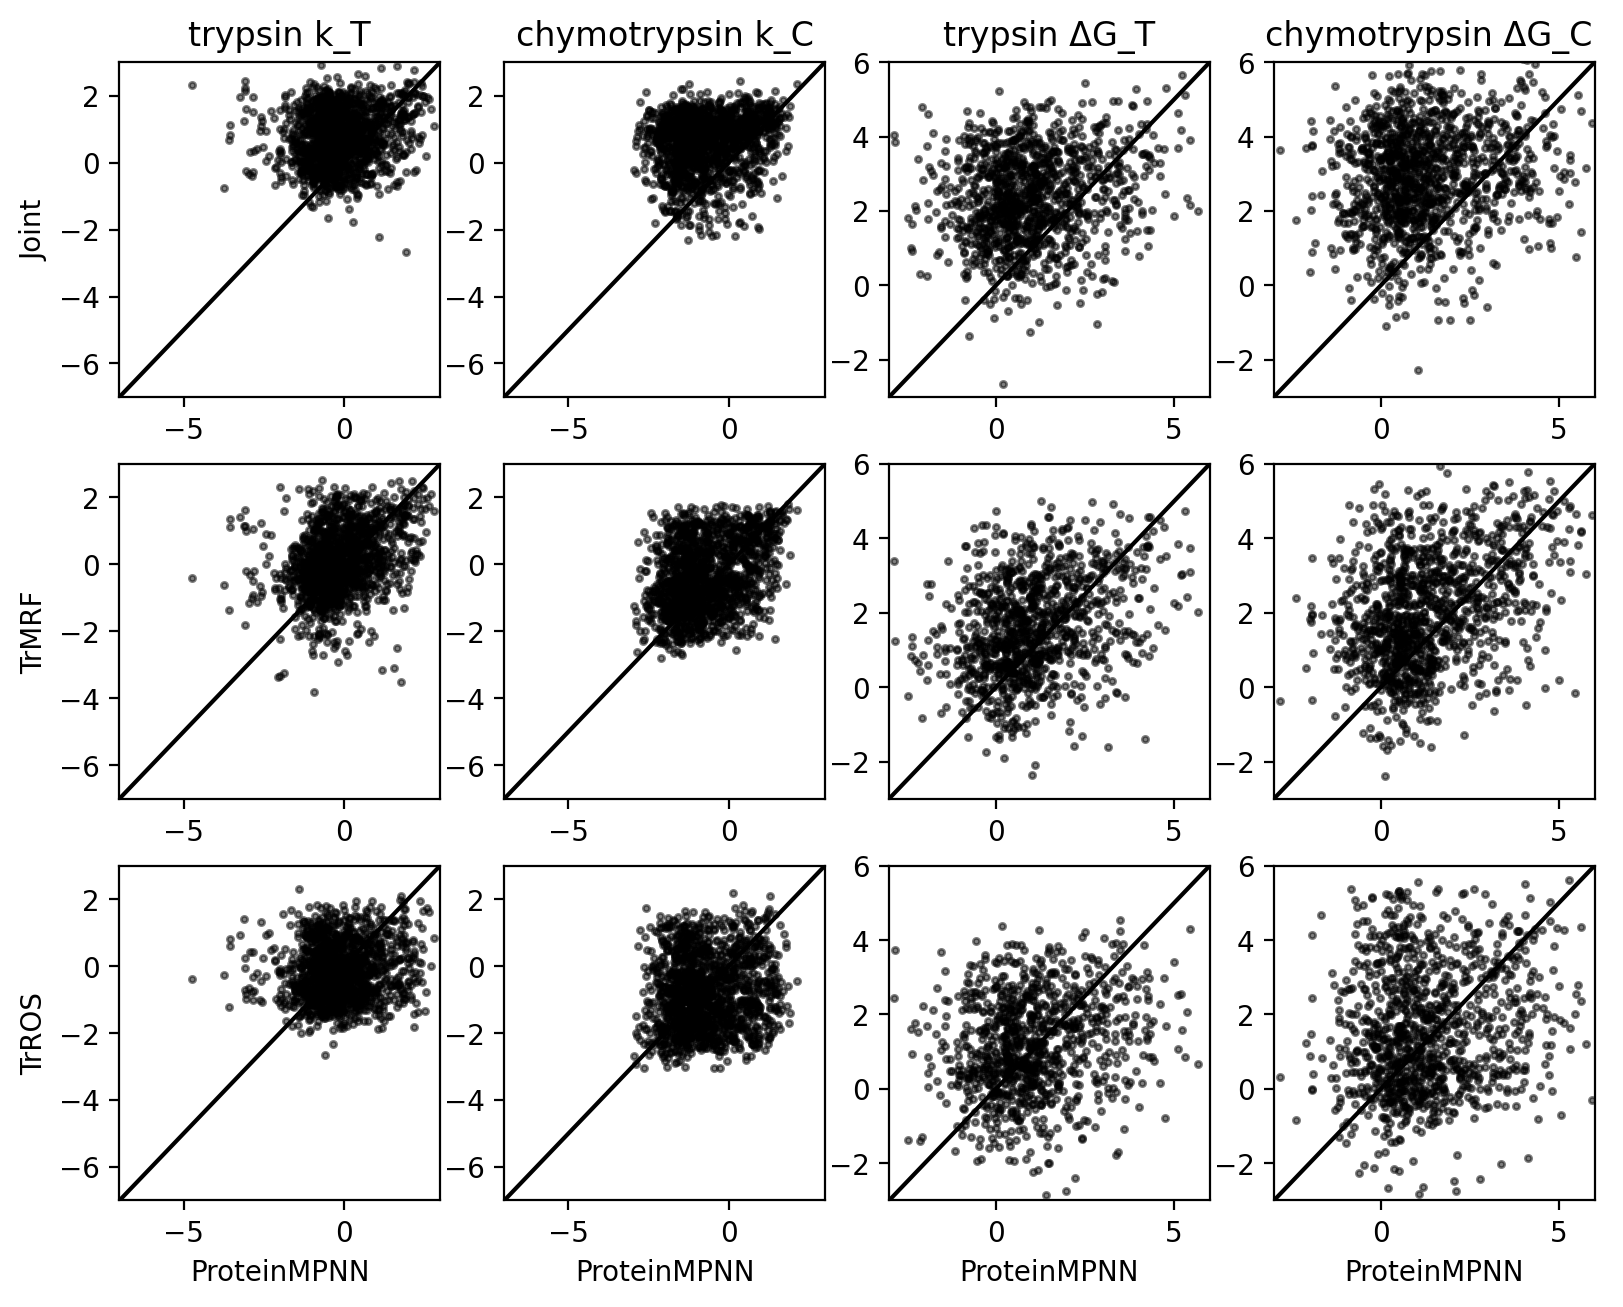

In [24]:
plt.figure(figsize=(12,10),dpi=200)

plt.subplot(4,5,1)
plt.title("trypsin k_T")
plt.scatter(_MPNN[:,0],_TrROS_TrMRF[:,0], color="black", alpha=0.5, s=5)
plt.xlim(-7,3);plt.ylim(-7,3);plt.ylabel("Joint");plt.plot([-7,3],[-7,3],color="black")
plt.subplot(4,5,2)
plt.title("chymotrypsin k_C")
plt.scatter(_MPNN[:,1],_TrROS_TrMRF[:,1], color="black", alpha=0.5, s=5)
plt.xlim(-7,3);plt.ylim(-7,3);plt.plot([-7,3],[-7,3],color="black")
plt.subplot(4,5,3)
plt.title("trypsin ΔG_T")
plt.scatter(_MPNN[:,2],_TrROS_TrMRF[:,2], color="black", alpha=0.5, s=5)
plt.xlim(-3,6);plt.ylim(-3, 6);plt.plot([-3,6],[-3,6],color="black")
plt.subplot(4,5,4)
plt.title("chymotrypsin ΔG_C ")
plt.scatter(_MPNN[:,3],_TrROS_TrMRF[:,3], color="black", alpha=0.5, s=5)
plt.xlim(-3,6);plt.ylim(-3, 6);plt.plot([-3,6],[-3,6],color="black")
# plt.subplot(4,5,5)
# plt.title("Hybrid \ncomposite_score")
# plt.scatter(_MPNN[:,7],_TrROS_TrMRF[:,7], color="black", alpha=0.5)
# plt.xlim(20,100);plt.ylim(20, 100);plt.plot([20,100],[20,100],color="black")

plt.subplot(4,5,6)
plt.scatter(_MPNN[:,0],_TrMRF[:,0], color="black", alpha=0.5, s=5)
plt.xlim(-7,3);plt.ylim(-7,3);plt.ylabel("TrMRF");plt.plot([-7,3],[-7,3],color="black")
plt.subplot(4,5,7)
plt.scatter(_MPNN[:,1],_TrMRF[:,1], color="black", alpha=0.5, s=5)
plt.xlim(-7,3);plt.ylim(-7,3);plt.plot([-7,3],[-7,3],color="black")

plt.subplot(4,5,8)
plt.scatter(_MPNN[:,2],_TrMRF[:,2], color="black", alpha=0.5, s=5)
plt.xlim(-3,6);plt.ylim(-3, 6);plt.plot([-3,6],[-3,6],color="black")
plt.subplot(4,5,9)
plt.scatter(_MPNN[:,3],_TrMRF[:,3], color="black", alpha=0.5, s=5)
plt.xlim(-3,6);plt.ylim(-3, 6);plt.plot([-3,6],[-3,6],color="black")
# plt.subplot(4,5,10)
# plt.scatter(_MPNN[:,7],_TrMRF[:,7], color="black", alpha=0.5)
# plt.xlim(20,100);plt.ylim(20, 100);plt.plot([20,100],[20,100],color="black")

plt.subplot(4,5,11)
plt.scatter(_MPNN[:,0],_TrROS[:,0], color="black", alpha=0.5, s=5)
plt.xlim(-7,3);plt.ylim(-7,3);plt.xlabel("ProteinMPNN");plt.ylabel("TrROS");plt.plot([-7,3],[-7,3],color="black")
plt.subplot(4,5,12)
plt.scatter(_MPNN[:,1],_TrROS[:,1], color="black", alpha=0.5, s=5)
plt.xlim(-7,3);plt.ylim(-7,3);plt.xlabel("ProteinMPNN");plt.plot([-7,3],[-7,3],color="black")

plt.subplot(4,5,13)
plt.scatter(_MPNN[:,2],_TrROS[:,2], color="black", alpha=0.5, s=5)
plt.xlim(-3,6);plt.ylim(-3, 6);plt.xlabel("ProteinMPNN");plt.plot([-3,6],[-3,6],color="black")
plt.subplot(4,5,14)
plt.scatter(_MPNN[:,3],_TrROS[:,3], color="black", alpha=0.5, s=5)
plt.xlim(-3,6);plt.ylim(-3, 6);plt.xlabel("ProteinMPNN");plt.plot([-3,6],[-3,6],color="black")

# plt.savefig('final_figures_all_4/MPNN_vs_others_experiment_evaluation.png', dpi =300)

plt.show()

/tmp/ipykernel_3772247/1786551493.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), fontweight='bold')  # Set x tick labels to bold
/tmp/ipykernel_3772247/1786551493.py:55: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), fontweight='bold')  # Set y tick labels to bold
/tmp/ipykernel_3772247/1786551493.py:58: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  plt.savefig('final_figures_all_4/joint_model_vs_others_experiment_evaluation.png', dpi =300)
/home/jupyter-yehlin/.local/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


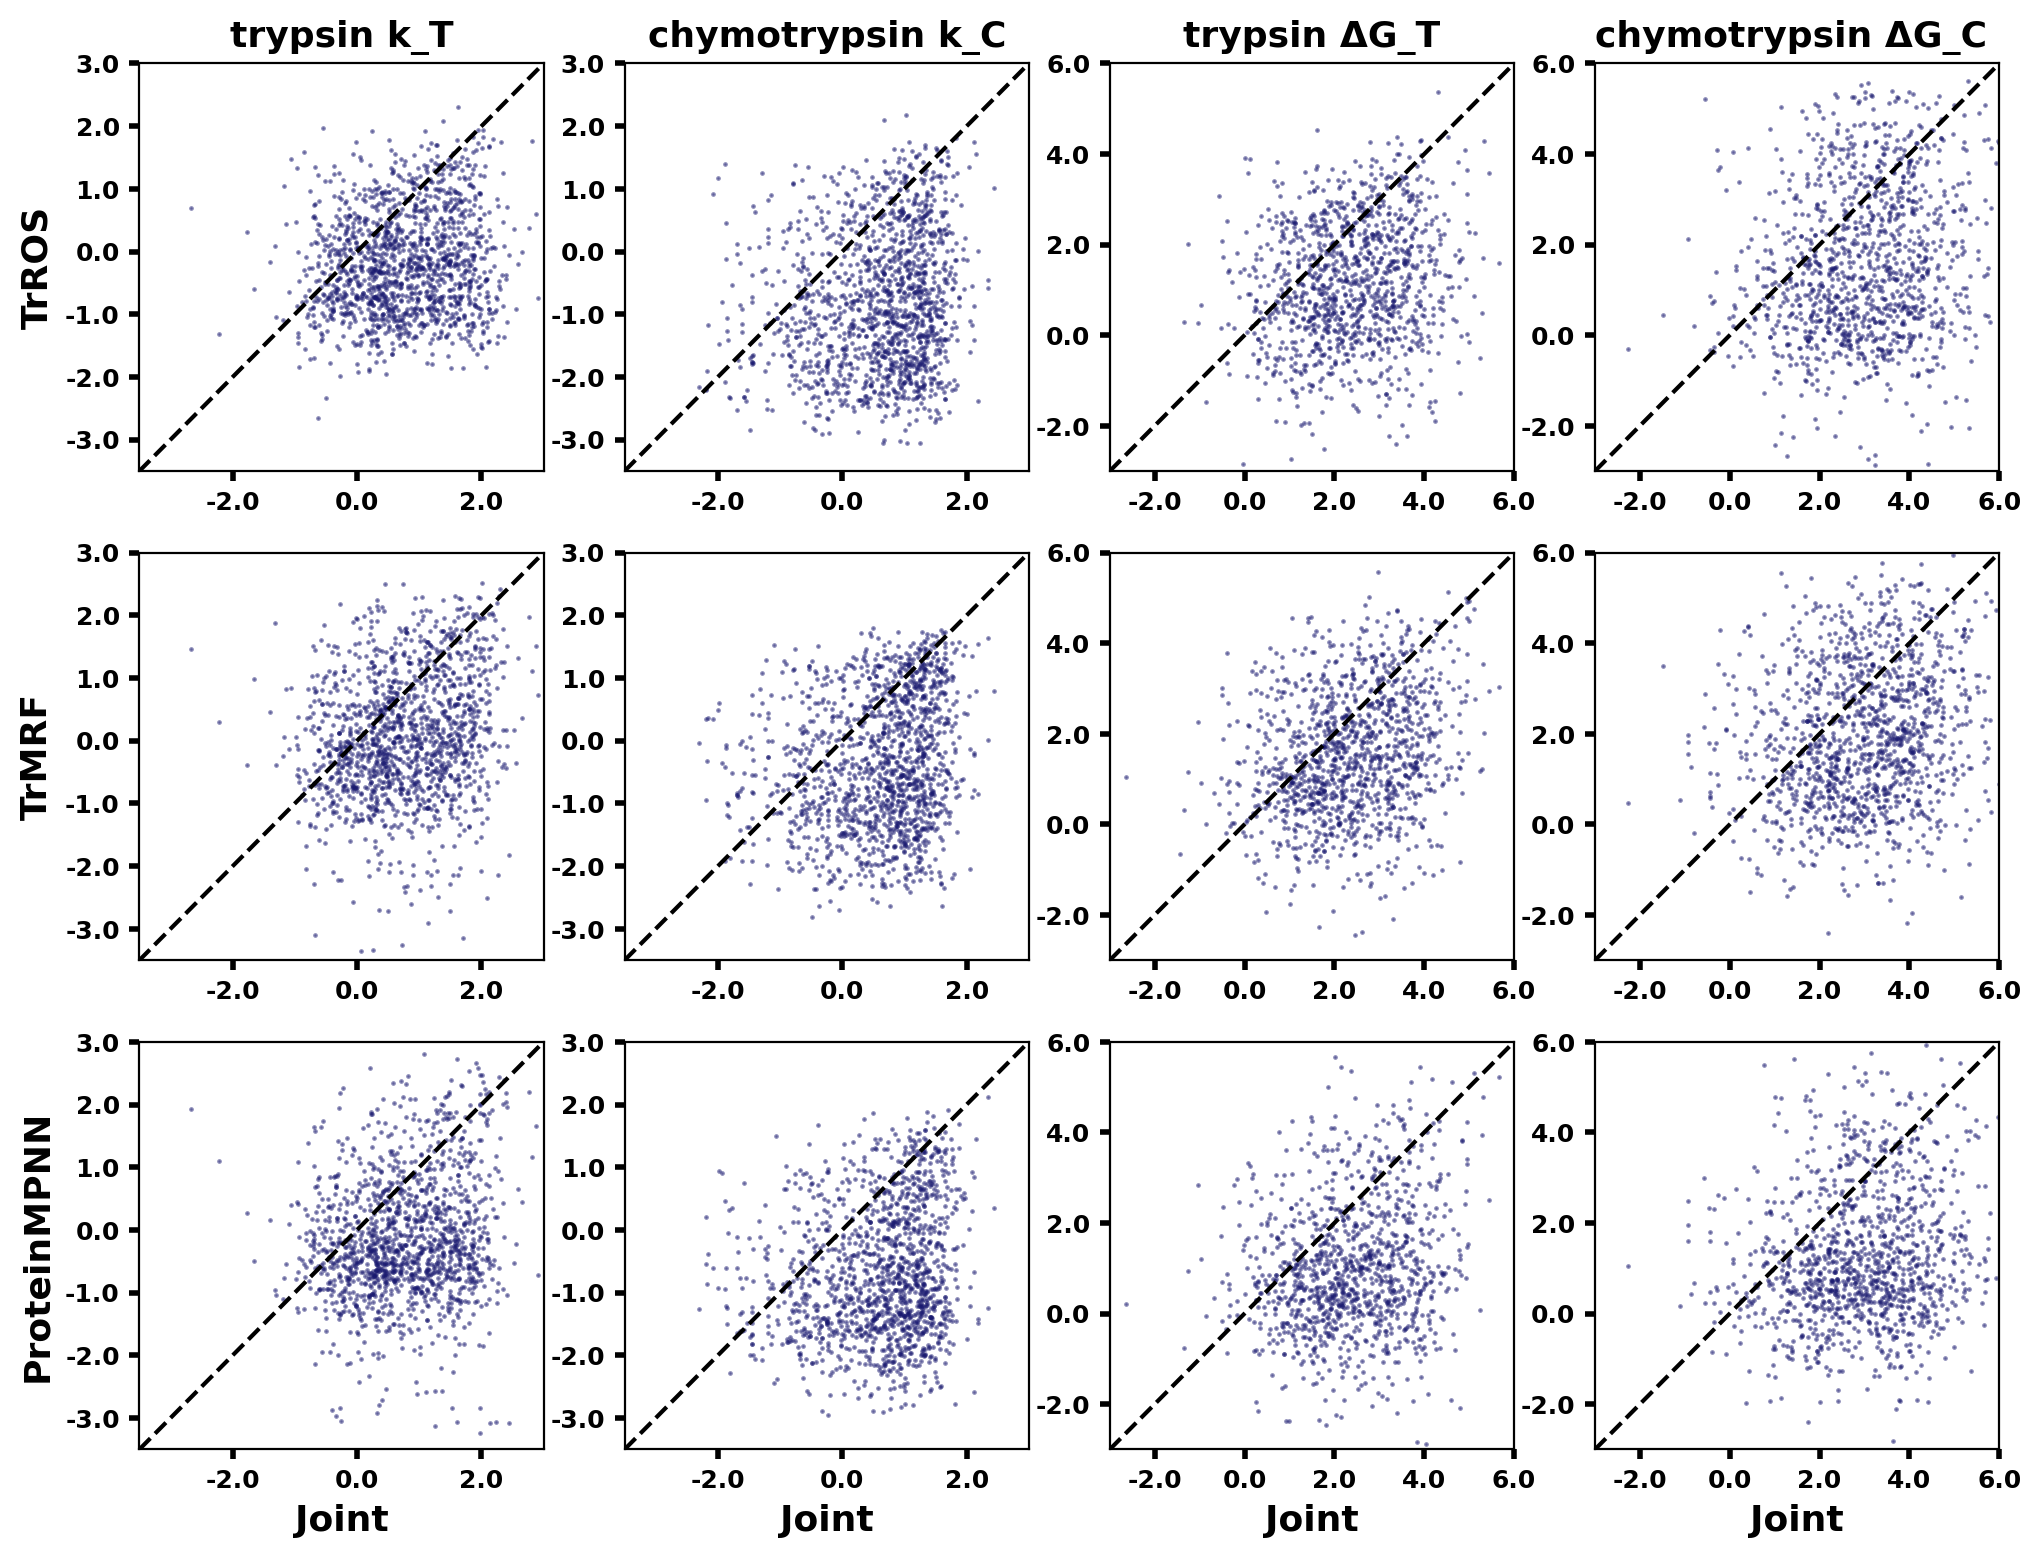

In [25]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 4, figsize=(12, 9), dpi=200, constrained_layout={'w_pad': 3, 'h_pad': 2})

plt.subplot(3,4,1)
plt.title("trypsin k_T", fontsize= 13, weight='bold')
plt.scatter(_TrROS_TrMRF[:,0],_TrROS[:,0], color="midnightblue", alpha=0.5, s=0.5)
plt.xlim(-3.5,3);plt.ylim(-3.5,3);plt.ylabel("TrROS", fontsize= 13, weight='bold');plt.plot([-7,3],[-7,3],color="black", linestyle='--')
plt.subplot(3,4,2)
plt.title("chymotrypsin k_C", fontsize= 13, weight='bold')
plt.scatter(_TrROS_TrMRF[:,1],_TrROS[:,1], color="midnightblue", alpha=0.5, s=0.5)
plt.xlim(-3.5,3);plt.ylim(-3.5,3);plt.plot([-7,3],[-7,3],color="black", linestyle='--')
plt.subplot(3,4,3)
plt.title("trypsin ΔG_T", fontsize= 13, weight='bold')
plt.scatter(_TrROS_TrMRF[:,2],_TrROS[:,2], color="midnightblue", alpha=0.5, s=0.5)
plt.xlim(-3,6);plt.ylim(-3, 6);plt.plot([-3,6],[-3,6],color="black", linestyle='--')
plt.subplot(3,4,4)
plt.title("chymotrypsin ΔG_C ", fontsize= 13, weight='bold')
plt.scatter(_TrROS_TrMRF[:,3],_TrROS[:,3], color="midnightblue", alpha=0.5, s=0.5)
plt.xlim(-3,6);plt.ylim(-3, 6);plt.plot([-3,6],[-3,6],color="black", linestyle='--')


plt.subplot(3,4,5)
plt.scatter(_TrROS_TrMRF[:,0],_TrMRF[:,0], color="midnightblue", alpha=0.5, s=0.5)
plt.xlim(-3.5,3);plt.ylim(-3.5,3);plt.ylabel("TrMRF", fontsize= 13, weight='bold');plt.plot([-7,3],[-7,3],color="black", linestyle='--')
plt.subplot(3,4,6)
plt.scatter(_TrROS_TrMRF[:,1],_TrMRF[:,1], color="midnightblue", alpha=0.5,s=0.5)
plt.xlim(-3.5,3);plt.ylim(-3.5,3);plt.plot([-7,3],[-7,3],color="black", linestyle='--')

plt.subplot(3,4,7)
plt.scatter(_TrROS_TrMRF[:,2],_TrMRF[:,2], color="midnightblue", alpha=0.5,s=0.5)
plt.xlim(-3,6);plt.ylim(-3, 6);plt.plot([-3,6],[-3,6],color="black", linestyle='--')
plt.subplot(3,4,8)
plt.scatter(_TrROS_TrMRF[:,3],_TrMRF[:,3], color="midnightblue", alpha=0.5,s=0.5)
plt.xlim(-3,6);plt.ylim(-3, 6);plt.plot([-3,6],[-3,6],color="black", linestyle='--')


plt.subplot(3,4,9)
plt.scatter(_TrROS_TrMRF[:,0],_MPNN[:,0], color="midnightblue", alpha=0.5 ,s=0.5)
plt.xlim(-3.5,3);plt.ylim(-3.5,3);plt.xlabel("Joint", fontsize= 13, weight='bold');plt.ylabel("ProteinMPNN", fontsize= 13, weight='bold');plt.plot([-7,3],[-7,3],color="black", linestyle='--')
plt.subplot(3,4,10)
plt.scatter(_TrROS_TrMRF[:,1],_MPNN[:,1], color="midnightblue", alpha=0.5, s=0.5)
plt.xlim(-3.5,3);plt.ylim(-3.5,3);plt.xlabel("Joint", fontsize= 13, weight='bold');plt.plot([-7,3],[-7,3],color="black", linestyle='--')
plt.subplot(3,4,11)
plt.scatter(_TrROS_TrMRF[:,2],_MPNN[:,2], color="midnightblue", alpha=0.5 , s=0.5)
plt.xlim(-3,6);plt.ylim(-3, 6);plt.xlabel("Joint", fontsize= 13, weight='bold');plt.plot([-3,6],[-3,6],color="black", linestyle='--')
plt.subplot(3,4,12)
plt.scatter(_TrROS_TrMRF[:,3],_MPNN[:,3], color="midnightblue", alpha=0.5 , s=0.5)
plt.xlim(-3,6);plt.ylim(-3, 6);plt.xlabel("Joint", fontsize= 13, weight='bold');plt.plot([-3,6],[-3,6],color="black", linestyle='--')

for ax in fig.get_axes():
    ax.tick_params(axis='both', which='both', labelsize=9, width=2)  # Increase fontsize and tick width
    ax.set_xticklabels(ax.get_xticks(), fontweight='bold')  # Set x tick labels to bold
    ax.set_yticklabels(ax.get_yticks(), fontweight='bold')  # Set y tick labels to bold
    
# plt.tight_layout()
plt.savefig('final_figures_all_4/joint_model_vs_others_experiment_evaluation.png', dpi =300)
plt.show()

/tmp/ipykernel_3772247/463682406.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), fontweight='bold')  # Set x tick labels to bold
/tmp/ipykernel_3772247/463682406.py:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), fontweight='bold')  # Set y tick labels to bold


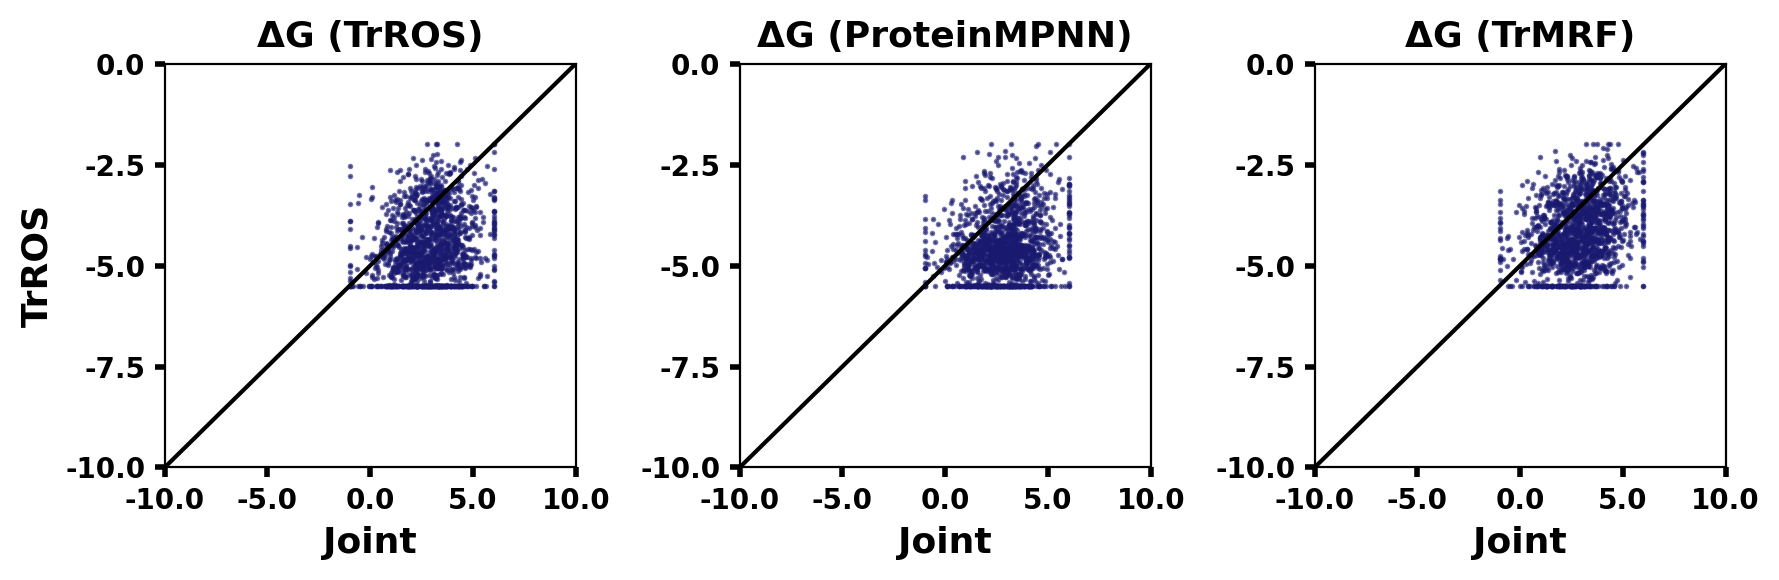

In [26]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Assuming _TrROS_TrMRF, _TrMRF, and _MPNN are already defined

# Define the number of plots to create in a single row
num_plots = 3

# Create a single row of subplots
fig, axs = plt.subplots(1, num_plots, figsize=(9, 3), dpi=200)

# Plot for TrROS vs. Joint for the last column
axs[0].scatter(_TrROS_TrMRF[:, 4], _TrROS[:, 4], c='midnightblue', alpha=0.6, s=1)
axs[0].set_title("ΔG (TrROS)", fontsize=13, weight='bold')
axs[0].set_xlim(-10, 10)
axs[0].set_ylim(-10, 10)
axs[0].plot([-10, 10], [-10, 10], color="black")
divider = make_axes_locatable(axs[0])

axs[0].set_xlabel("Joint", fontsize=13, weight='bold')
axs[0].set_ylabel("TrROS", fontsize=13, weight='bold')

# Plot for MPNN vs. Joint for the last column
axs[1].scatter(_TrROS_TrMRF[:, 4], _MPNN[:, 4], c='midnightblue', alpha=0.6, s=1)
axs[1].set_title("ΔG (ProteinMPNN)", fontsize=13, weight='bold')
axs[1].set_xlim(-10, 10)
axs[1].set_ylim(-10, 10)
axs[1].plot([-10, 10], [-10, 10], color="black")
divider = make_axes_locatable(axs[1])

axs[1].set_xlabel("Joint", fontsize=13, weight='bold')

# Optional: You can add any additional metric here
# For example, you can use another metric or modify it accordingly
axs[2].scatter(_TrROS_TrMRF[:, 4], _TrMRF[:, 4], c='midnightblue', alpha=0.6, s=1)
axs[2].set_title("ΔG (TrMRF)", fontsize=13, weight='bold')
axs[2].set_xlim(-10, 10)
axs[2].set_ylim(-10, 10)
axs[2].plot([-10, 10], [-10, 10], color="black")
divider = make_axes_locatable(axs[2])

axs[2].set_xlabel("Joint", fontsize=13, weight='bold')

# Customize ticks and labels
for ax in axs:
    ax.tick_params(axis='both', which='both', labelsize=10, width=2)  # Increase fontsize and tick width
    ax.set_xticklabels(ax.get_xticks(), fontweight='bold')  # Set x tick labels to bold
    ax.set_yticklabels(ax.get_yticks(), fontweight='bold')  # Set y tick labels to bold

# Show the plot
plt.tight_layout()
plt.show()


In [27]:
# _TrROS

/tmp/ipykernel_3772247/1537096912.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), fontweight='bold')  # Set x tick labels to bold
/tmp/ipykernel_3772247/1537096912.py:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), fontweight='bold')  # Set y tick labels to bold


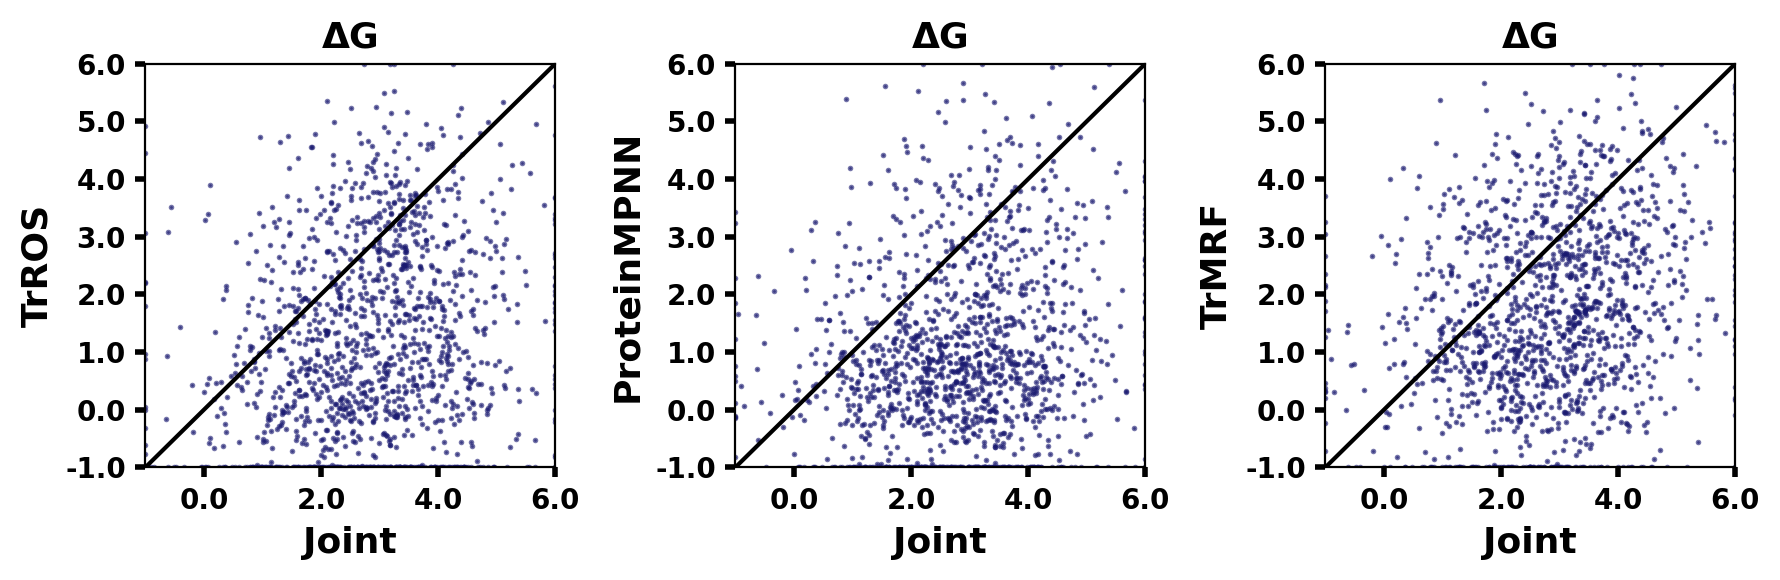

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Assuming _TrROS_TrMRF, _TrMRF, and _MPNN are already defined

# Clip the data between -1 and 6
clipped_TrROS = np.clip(_TrROS[:, 4], -1, 6)
clipped_MPNN = np.clip(_MPNN[:, 4], -1, 6)
clipped_MRF = np.clip(_TrMRF[:, 4], -1, 6)
clipped_joint = np.clip(_TrROS_TrMRF[:, 4], -1, 6)

# Define the number of plots to create in a single row
num_plots = 3

# Create a single row of subplots
fig, axs = plt.subplots(1, num_plots, figsize=(9, 3), dpi=200)

# Plot for TrROS vs. Joint for the first column
axs[0].scatter(clipped_joint, clipped_TrROS, c='midnightblue', alpha=0.6, s=1)
axs[0].set_xlim(-1, 6)
axs[0].set_ylim(-1, 6)
axs[0].set_title("ΔG", fontsize=13, weight='bold')
axs[0].plot([-1, 6], [-1, 6], color="black")
axs[0].set_xlabel("Joint", fontsize=13, weight='bold')
axs[0].set_ylabel("TrROS", fontsize=13, weight='bold')

# Plot for MPNN vs. Joint for the second column
axs[1].scatter(clipped_joint, clipped_MPNN, c='midnightblue', alpha=0.6, s=1)
axs[1].set_xlim(-1, 6)
axs[1].set_ylim(-1, 6)
axs[1].plot([-1, 6], [-1, 6], color="black")

axs[1].set_xlabel("Joint", fontsize=13, weight='bold')
axs[1].set_ylabel("ProteinMPNN", fontsize=13, weight='bold')
axs[1].set_title("ΔG", fontsize=13, weight='bold')
# Plot for MRF vs. Joint for the third column
axs[2].scatter(clipped_joint, clipped_MRF, c='midnightblue', alpha=0.6, s=1)
axs[2].set_xlim(-1, 6)
axs[2].set_ylim(-1, 6)
axs[2].plot([-1, 6], [-1, 6], color="black")

axs[2].set_xlabel("Joint", fontsize=13, weight='bold')
axs[2].set_ylabel("TrMRF", fontsize=13, weight='bold')
axs[2].set_title("ΔG", fontsize=13, weight='bold')
# Customize ticks and labels
for ax in axs:
    ax.tick_params(axis='both', which='both', labelsize=10, width=2)  # Increase fontsize and tick width
    ax.set_xticklabels(ax.get_xticks(), fontweight='bold')  # Set x tick labels to bold
    ax.set_yticklabels(ax.get_yticks(), fontweight='bold')  # Set y tick labels to bold
plt.tight_layout()
plt.savefig('final_figures_all_4/joint_model_vs_others_experiment_evaluation_dG.png', dpi =300)

plt.show()


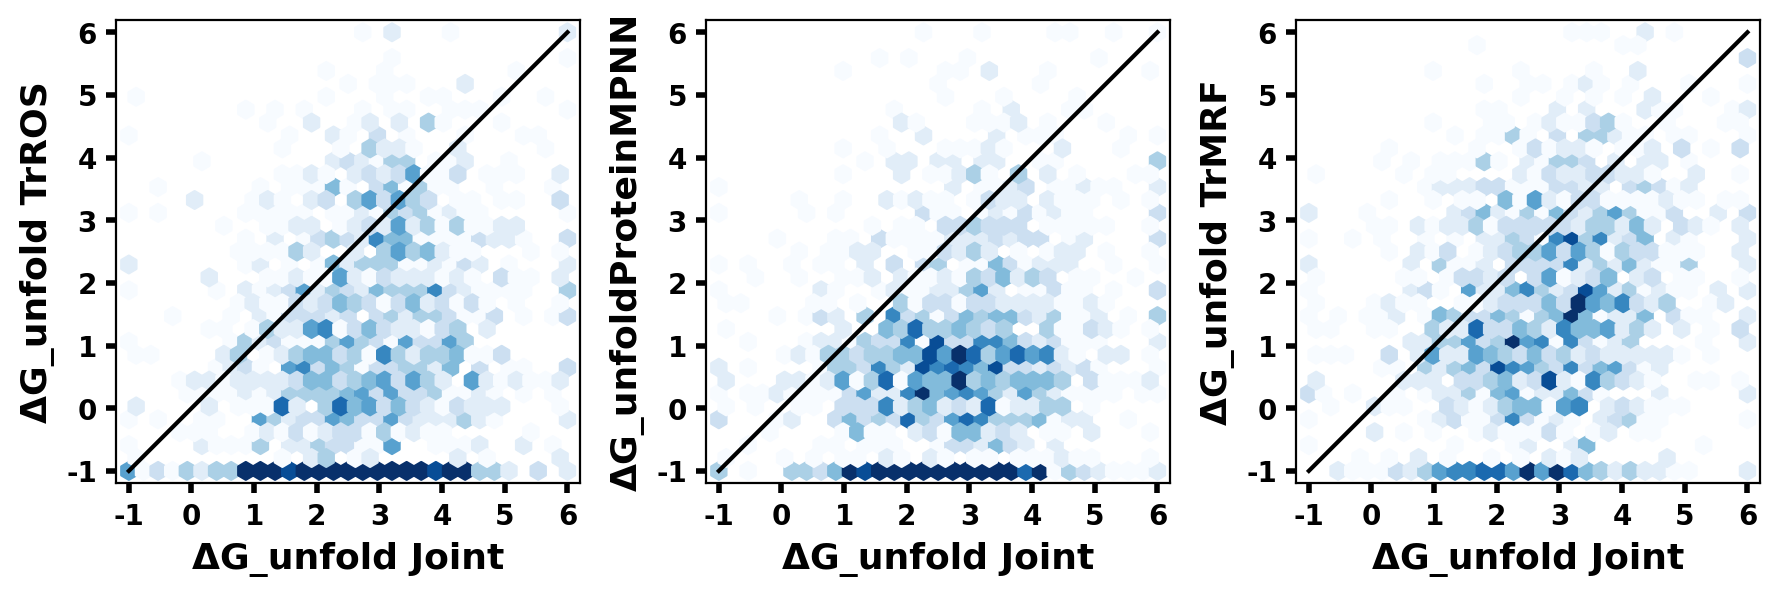

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Assuming _TrROS_TrMRF, _TrMRF, and _MPNN are already defined

# Clip the data between -1 and 6
clipped_TrROS = np.clip(_TrROS[:, 4], -1, 6)
clipped_MPNN = np.clip(_MPNN[:, 4], -1, 6)
clipped_MRF = np.clip(_TrMRF[:, 4], -1, 6)
clipped_joint = np.clip(_TrROS_TrMRF[:, 4], -1, 6)

# Define the number of plots to create in a single row
num_plots = 3

# Create a figure with Gridspec for equal spacing
fig = plt.figure(figsize=(9, 3), dpi=200)
gs = fig.add_gridspec(1, num_plots, width_ratios=[1, 1, 1])  # Equal width for each plot
axs = [fig.add_subplot(gs[0]), fig.add_subplot(gs[1]), fig.add_subplot(gs[2])]

# Set a desired vmax for all plots
vmax_value = 10  # Adjust this value to control the color intensity limit

# Define the common x and y limits
xlim = (-1.2, 6.2)
ylim = (-1.2, 6.2)

# Plot for TrROS vs. Joint for the first column (Hexbin)
hb0 = axs[0].hexbin(clipped_joint, clipped_TrROS, gridsize=30, cmap='Blues', mincnt=1, vmax=vmax_value)
axs[0].set_xlim(xlim)
axs[0].set_ylim(ylim)
axs[0].plot([-1, 6], [-1, 6], color="black")
axs[0].set_xlabel("ΔG_unfold Joint", fontsize=13, weight='bold')
axs[0].set_ylabel("ΔG_unfold TrROS", fontsize=13, weight='bold')
axs[0].set_aspect('equal', adjustable='box')  # Same scale for both axes

# Plot for MPNN vs. Joint for the second column (Hexbin)
hb1 = axs[1].hexbin(clipped_joint, clipped_MPNN, gridsize=30, cmap='Blues', mincnt=1, vmax=vmax_value)
axs[1].set_xlim(xlim)
axs[1].set_ylim(ylim)
axs[1].plot([-1, 6], [-1, 6], color="black")
axs[1].set_xlabel("ΔG_unfold Joint", fontsize=13, weight='bold')
axs[1].set_ylabel("ΔG_unfoldProteinMPNN", fontsize=13, weight='bold')

axs[1].set_aspect('equal', adjustable='box')  # Same scale for both axes

# Plot for MRF vs. Joint for the third column (Hexbin)
hb2 = axs[2].hexbin(clipped_joint, clipped_MRF, gridsize=30, cmap='Blues', mincnt=1, vmax=vmax_value)
axs[2].set_xlim(xlim)
axs[2].set_ylim(ylim)
axs[2].plot([-1, 6], [-1, 6], color="black")
axs[2].set_xlabel("ΔG_unfold Joint", fontsize=13, weight='bold')
axs[2].set_ylabel("ΔG_unfold TrMRF", fontsize=13, weight='bold')
axs[2].set_aspect('equal', adjustable='box')  # Same scale for both axes

# # Add colorbar to the last plot with bold label
# cbar = fig.colorbar(hb2, ax=axs[2], orientation='vertical', fraction=0.046, pad=0.04)
# cbar.set_label('Density', fontsize=13, weight='bold')  # Set label to bold with font size

# Set the same ticks for all axes to ensure uniform scaling
ticks = np.arange(-1, 7, 1)  # Adjust as needed
for ax in axs:
    ax.set_xticks(ticks)  # Set x-ticks to be consistent across all plots
    ax.set_yticks(ticks)  # Set y-ticks to be consistent across all plots
    ax.tick_params(axis='both', which='both', labelsize=10, width=2)  # Increase fontsize and tick width
    ax.set_xticklabels(ax.get_xticks(), fontweight='bold')  # Set x tick labels to bold
    ax.set_yticklabels(ax.get_yticks(), fontweight='bold')  # Set y tick labels to bold

plt.tight_layout()
plt.savefig('final_figures_all_4/joint_model_vs_others_experiment_evaluation_dG_hexbin_with_legend.png', dpi=300)
plt.show()

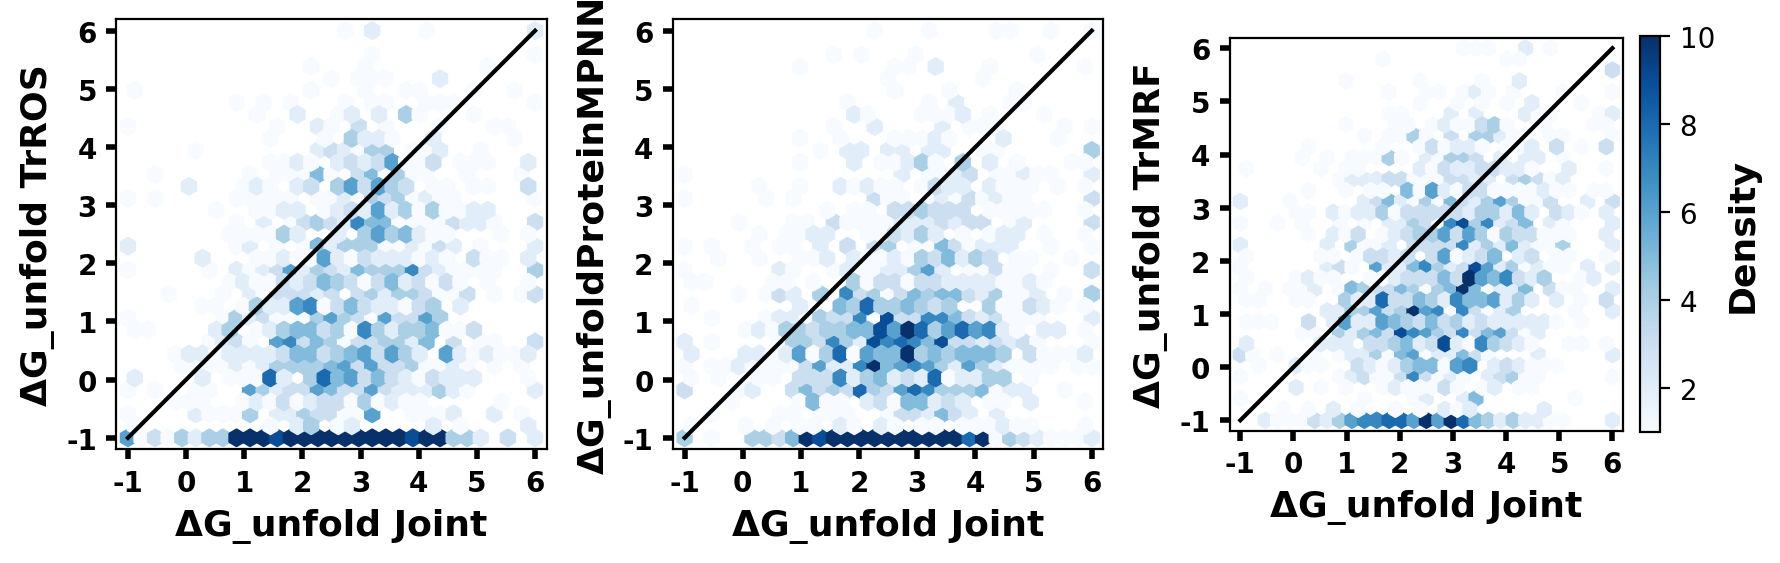

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Assuming _TrROS_TrMRF, _TrMRF, and _MPNN are already defined

# Clip the data between -1 and 6
clipped_TrROS = np.clip(_TrROS[:, 4], -1, 6)
clipped_MPNN = np.clip(_MPNN[:, 4], -1, 6)
clipped_MRF = np.clip(_TrMRF[:, 4], -1, 6)
clipped_joint = np.clip(_TrROS_TrMRF[:, 4], -1, 6)

# Define the number of plots to create in a single row
num_plots = 3

# Create a figure with Gridspec for equal spacing
fig = plt.figure(figsize=(9, 3), dpi=200)
gs = fig.add_gridspec(1, num_plots, width_ratios=[1, 1, 1])  # Equal width for each plot
axs = [fig.add_subplot(gs[0]), fig.add_subplot(gs[1]), fig.add_subplot(gs[2])]

# Set a desired vmax for all plots
vmax_value = 10  # Adjust this value to control the color intensity limit

# Define the common x and y limits
xlim = (-1.2, 6.2)
ylim = (-1.2, 6.2)

# Plot for TrROS vs. Joint for the first column (Hexbin)
hb0 = axs[0].hexbin(clipped_joint, clipped_TrROS, gridsize=30, cmap='Blues', mincnt=1, vmax=vmax_value)
axs[0].set_xlim(xlim)
axs[0].set_ylim(ylim)
axs[0].plot([-1, 6], [-1, 6], color="black")
axs[0].set_xlabel("ΔG_unfold Joint", fontsize=13, weight='bold')
axs[0].set_ylabel("ΔG_unfold TrROS", fontsize=13, weight='bold')
axs[0].set_aspect('equal', adjustable='box')  # Same scale for both axes

# Plot for MPNN vs. Joint for the second column (Hexbin)
hb1 = axs[1].hexbin(clipped_joint, clipped_MPNN, gridsize=30, cmap='Blues', mincnt=1, vmax=vmax_value)
axs[1].set_xlim(xlim)
axs[1].set_ylim(ylim)
axs[1].plot([-1, 6], [-1, 6], color="black")
axs[1].set_xlabel("ΔG_unfold Joint", fontsize=13, weight='bold')
axs[1].set_ylabel("ΔG_unfoldProteinMPNN", fontsize=13, weight='bold')

axs[1].set_aspect('equal', adjustable='box')  # Same scale for both axes

# Plot for MRF vs. Joint for the third column (Hexbin)
hb2 = axs[2].hexbin(clipped_joint, clipped_MRF, gridsize=30, cmap='Blues', mincnt=1, vmax=vmax_value)
axs[2].set_xlim(xlim)
axs[2].set_ylim(ylim)
axs[2].plot([-1, 6], [-1, 6], color="black")
axs[2].set_xlabel("ΔG_unfold Joint", fontsize=13, weight='bold')
axs[2].set_ylabel("ΔG_unfold TrMRF", fontsize=13, weight='bold')
axs[2].set_aspect('equal', adjustable='box')  # Same scale for both axes

# # Add colorbar to the last plot with bold label
cbar = fig.colorbar(hb2, ax=axs[2], orientation='vertical', fraction=0.046, pad=0.04)
cbar.set_label('Density', fontsize=13, weight='bold')  # Set label to bold with font size

# Set the same ticks for all axes to ensure uniform scaling
ticks = np.arange(-1, 7, 1)  # Adjust as needed
for ax in axs:
    ax.set_xticks(ticks)  # Set x-ticks to be consistent across all plots
    ax.set_yticks(ticks)  # Set y-ticks to be consistent across all plots
    ax.tick_params(axis='both', which='both', labelsize=10, width=2)  # Increase fontsize and tick width
    ax.set_xticklabels(ax.get_xticks(), fontweight='bold')  # Set x tick labels to bold
    ax.set_yticklabels(ax.get_yticks(), fontweight='bold')  # Set y tick labels to bold

plt.tight_layout()
plt.show()

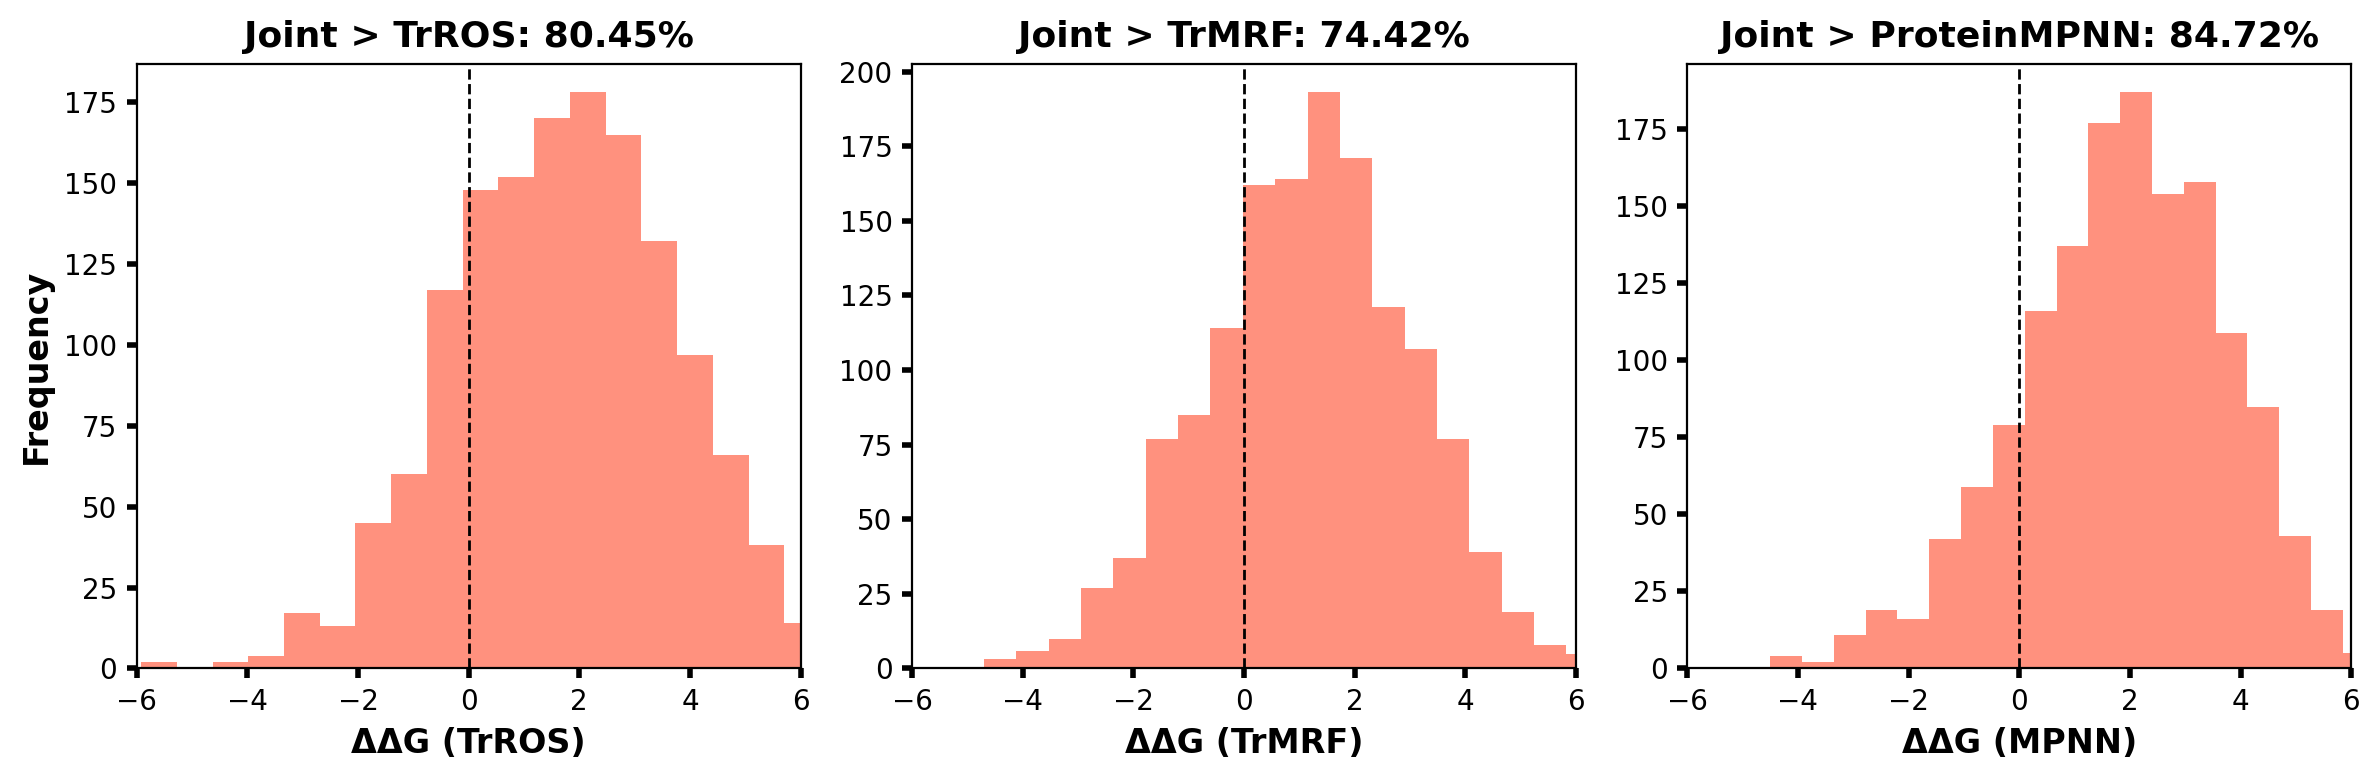

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Assuming _TrROS_TrMRF, _TrMRF, and _MPNN are already defined

# Clip the data between -1 and 6
clipped_TrROS = np.clip(_TrROS[:, 4], -1, 6)
clipped_MPNN = np.clip(_MPNN[:, 4], -1, 6)
clipped_MRF = np.clip(_TrMRF[:, 4], -1, 6)
clipped_joint = np.clip(_TrROS_TrMRF[:, 4], -1, 6)

# Calculate the delta delta G values
delta_delta_G_TrROS = clipped_joint - clipped_TrROS
delta_delta_G_MPNN = clipped_joint - clipped_MPNN
delta_delta_G_MRF = clipped_joint - clipped_MRF

# Define a custom red-orange colormap
colors = ["#FF6347", "#FF6347", "#FF6347"]  # Red-Orange colors
red_orange_cmap = LinearSegmentedColormap.from_list("red_orange_cmap", colors)

# Calculate where Joint model has higher values than each respective model
count_joint_vs_TrROS = np.sum(clipped_joint > clipped_TrROS) / len(clipped_joint) * 100
count_joint_vs_MPNN = np.sum(clipped_joint > clipped_MPNN) / len(clipped_joint) * 100
count_joint_vs_MRF = np.sum(clipped_joint > clipped_MRF) / len(clipped_joint) * 100

# Define the number of plots to create in a single row
num_plots = 3

# Create a single row of subplots for histograms
fig, axs = plt.subplots(1, num_plots, figsize=(12, 4), dpi=200)

# Define x-axis limits for all histograms
x_limits = (-6, 6)

# Plot histogram for Joint vs. TrROS delta delta G
axs[0].hist(delta_delta_G_TrROS, bins=20, color=red_orange_cmap(0.2), alpha=0.7)
axs[0].set_title(f"Joint > TrROS: {count_joint_vs_TrROS:.2f}%", fontsize=13, weight='bold')
axs[0].set_xlabel("ΔΔG (TrROS)", fontsize=12, weight='bold')
axs[0].set_ylabel("Frequency", fontsize=12, weight='bold')
axs[0].axvline(0, color='black', linestyle='--', linewidth=1)  # Add vertical line at x=0
axs[0].set_xlim(x_limits)  # Set x-axis limits

# Plot histogram for Joint vs. MRF delta delta G
axs[1].hist(delta_delta_G_MRF, bins=20, color=red_orange_cmap(0.8), alpha=0.7)
axs[1].set_title(f"Joint > TrMRF: {count_joint_vs_MRF:.2f}%", fontsize=13, weight='bold')
axs[1].set_xlabel("ΔΔG (TrMRF)", fontsize=12, weight='bold')
axs[1].axvline(0, color='black', linestyle='--', linewidth=1)  # Add vertical line at x=0
axs[1].set_xlim(x_limits)  # Set x-axis limits

# Plot histogram for Joint vs. MPNN delta delta G
axs[2].hist(delta_delta_G_MPNN, bins=20, color=red_orange_cmap(0.5), alpha=0.7)
axs[2].set_title(f"Joint > ProteinMPNN: {count_joint_vs_MPNN:.2f}%", fontsize=13, weight='bold')
axs[2].set_xlabel("ΔΔG (MPNN)", fontsize=12, weight='bold')
axs[2].axvline(0, color='black', linestyle='--', linewidth=1)  # Add vertical line at x=0
axs[2].set_xlim(x_limits)  # Set x-axis limits

for ax in axs:
    ax.tick_params(axis='both', which='both', labelsize=10, width=2)  # Increase fontsize and tick width

plt.tight_layout()
plt.savefig('final_figures_all_4/histogram_joint_model_vs_others_experiment_evaluation_dG.png', dpi=300)
plt.show()

In [31]:
len(_TrROS[:,4])

1427

/tmp/ipykernel_3772247/2300057868.py:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([f"{int(x)}" for x in ax.get_xticks()], fontweight='bold')
/tmp/ipykernel_3772247/2300057868.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f"{round(y, 2)}" for y in ax.get_yticks()], fontweight='bold')


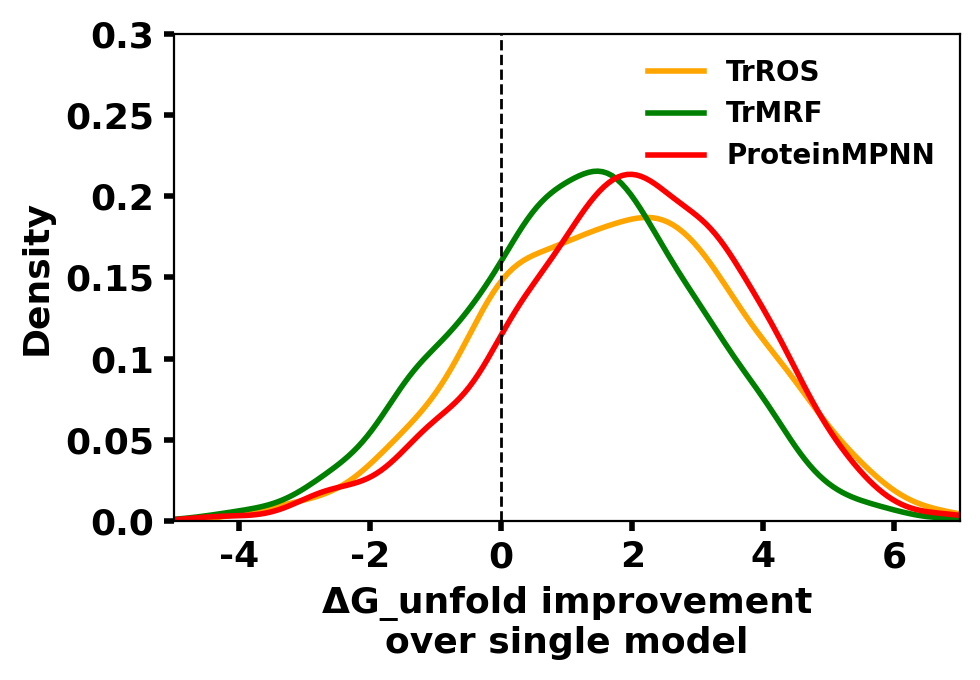

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.ticker import MaxNLocator

# Assuming _TrROS_TrMRF, _TrMRF, and _MPNN are already defined

# Clip the data between -1 and 6
clipped_TrROS = np.clip(_TrROS[:, 4], -1, 6)
clipped_MPNN = np.clip(_MPNN[:, 4], -1, 6)
clipped_MRF = np.clip(_TrMRF[:, 4], -1, 6)
clipped_joint = np.clip(_TrROS_TrMRF[:, 4], -1, 6)

# Calculate the delta delta G values
delta_delta_G_TrROS = clipped_joint - clipped_TrROS
delta_delta_G_MPNN = clipped_joint - clipped_MPNN
delta_delta_G_MRF = clipped_joint - clipped_MRF

# Define a custom red-orange colormap
colors = ["#FF6347", "#FFA500", "#FF4500"]  # Different shades of red-orange for outlines
red_orange_cmap = LinearSegmentedColormap.from_list("red_orange_cmap", colors)

# Calculate where Joint model has higher values than each respective model
count_joint_vs_TrROS = np.sum(clipped_joint > clipped_TrROS) / len(clipped_joint) * 100
count_joint_vs_MPNN = np.sum(clipped_joint > clipped_MPNN) / len(clipped_joint) * 100
count_joint_vs_MRF = np.sum(clipped_joint > clipped_MRF) / len(clipped_joint) * 100

# Create a single plot for KDE
fig, ax = plt.subplots(figsize=(5, 3.5), dpi=200)

# Define x-axis limits for the KDE plot
x_limits = (-5, 7)

# Plot KDE for Joint vs. TrROS, MRF, and MPNN delta delta G with outline
sns.kdeplot(delta_delta_G_TrROS, color='orange', linewidth=2, label='TrROS', ax=ax)
sns.kdeplot(delta_delta_G_MRF, color='green', linewidth=2, label='TrMRF', ax=ax)
sns.kdeplot(delta_delta_G_MPNN, color='red', linewidth=2, label='ProteinMPNN', ax=ax)

# Add titles and labels
ax.set_xlabel("ΔG_unfold improvement\nover single model", fontsize=13, weight='bold')
ax.set_ylabel("Density", fontsize=13, weight='bold')
ax.axvline(0, color='black', linestyle='--', linewidth=1)  # Add vertical line at x=0
ax.set_xlim(x_limits)  # Set x-axis limits
ax.set_ylim([0, 0.3])  # Set y-axis limits suitable for KDE

# Force integer labels for both x-axis
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

# Bold tick labels for both axes
ax.tick_params(axis='both', which='both', labelsize=13, width=2)
ax.set_xticklabels([f"{int(x)}" for x in ax.get_xticks()], fontweight='bold')
ax.set_yticklabels([f"{round(y, 2)}" for y in ax.get_yticks()], fontweight='bold')

ax.legend(frameon=False, fontsize=13, prop={'size':10,'weight':'bold'}, loc="upper right")

plt.tight_layout()
plt.savefig('final_figures_all_4/merged_kde_joint_model_vs_others_experiment_evaluation_dG_outline.png', dpi=300)
plt.show()


In [33]:
# Calculate where Joint model has higher values than each respective model
print(count_joint_vs_TrROS)
print(count_joint_vs_MPNN)
print(count_joint_vs_MRF)


80.44849334267694
84.72319551506658
74.4218640504555


/tmp/ipykernel_3772247/3850169934.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), fontweight='bold')  # Set x tick labels to bold
/tmp/ipykernel_3772247/3850169934.py:55: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), fontweight='bold')  # Set y tick labels to bold


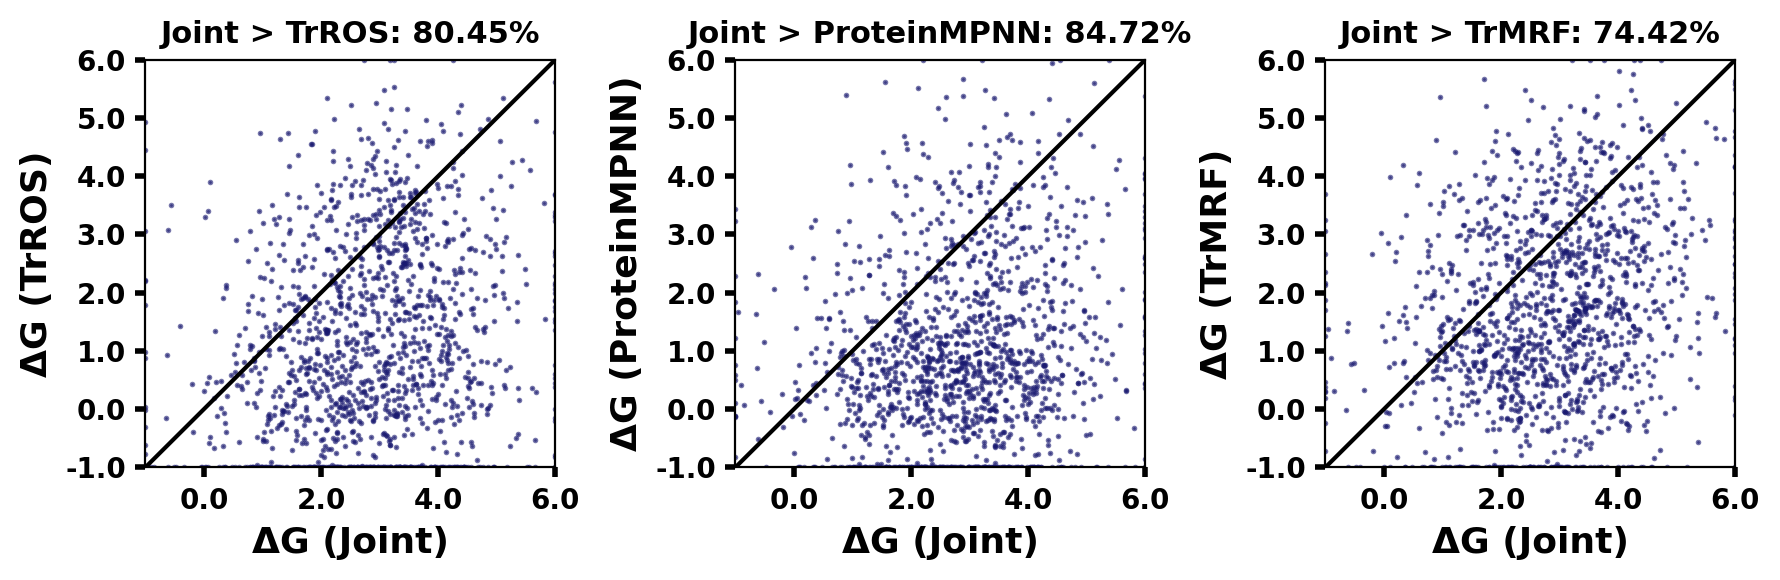

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Assuming _TrROS_TrMRF, _TrMRF, and _MPNN are already defined

# Clip the data between -1 and 6
clipped_TrROS = np.clip(_TrROS[:, 4], -1, 6)
clipped_MPNN = np.clip(_MPNN[:, 4], -1, 6)
clipped_MRF = np.clip(_TrMRF[:, 4], -1, 6)
clipped_joint = np.clip(_TrROS_TrMRF[:, 4], -1, 6)

# Define the number of plots to create in a single row
num_plots = 3

# Create a single row of subplots
fig, axs = plt.subplots(1, num_plots, figsize=(9, 3), dpi=200)

# Calculate where Joint model has higher values than each respective model
count_joint_vs_TrROS = np.sum(clipped_joint > clipped_TrROS) / len(clipped_joint) * 100
count_joint_vs_MPNN = np.sum(clipped_joint > clipped_MPNN) / len(clipped_joint) * 100
count_joint_vs_MRF = np.sum(clipped_joint > clipped_MRF) / len(clipped_joint) * 100

# Plot for TrROS vs. Joint for the first column
axs[0].scatter(clipped_joint, clipped_TrROS, c='midnightblue', alpha=0.6, s=1)
axs[0].set_xlim(-1, 6)
axs[0].set_ylim(-1, 6)
axs[0].set_title(f"Joint > TrROS: {count_joint_vs_TrROS:.2f}%", fontsize=11, weight='bold')
axs[0].plot([-1, 6], [-1, 6], color="black")
axs[0].set_xlabel("ΔG (Joint)", fontsize=13, weight='bold')
axs[0].set_ylabel("ΔG (TrROS)", fontsize=13, weight='bold')

# Plot for MPNN vs. Joint for the second column
axs[1].scatter(clipped_joint, clipped_MPNN, c='midnightblue', alpha=0.6, s=1)
axs[1].set_xlim(-1, 6)
axs[1].set_ylim(-1, 6)
axs[1].plot([-1, 6], [-1, 6], color="black")
axs[1].set_xlabel("ΔG (Joint)", fontsize=13, weight='bold')
axs[1].set_ylabel("ΔG (ProteinMPNN)", fontsize=13, weight='bold')
axs[1].set_title(f"Joint > ProteinMPNN: {count_joint_vs_MPNN:.2f}%", fontsize=11, weight='bold')

# Plot for MRF vs. Joint for the third column
axs[2].scatter(clipped_joint, clipped_MRF, c='midnightblue', alpha=0.6, s=1)
axs[2].set_xlim(-1, 6)
axs[2].set_ylim(-1, 6)
axs[2].plot([-1, 6], [-1, 6], color="black")
axs[2].set_xlabel("ΔG (Joint)", fontsize=13, weight='bold')
axs[2].set_ylabel("ΔG (TrMRF)", fontsize=13, weight='bold')
axs[2].set_title(f"Joint > TrMRF: {count_joint_vs_MRF:.2f}%", fontsize=11, weight='bold')

# Customize ticks and labels
for ax in axs:
    ax.tick_params(axis='both', which='both', labelsize=10, width=2)  # Increase fontsize and tick width
    ax.set_xticklabels(ax.get_xticks(), fontweight='bold')  # Set x tick labels to bold
    ax.set_yticklabels(ax.get_yticks(), fontweight='bold')  # Set y tick labels to bold

plt.tight_layout()
plt.savefig('final_figures_all_4/joint_model_vs_others_experiment_evaluation_dG.png', dpi=300)

plt.show()


/tmp/ipykernel_3703295/3167960060.py:82: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), fontweight='bold')  # Set x tick labels to bold
/tmp/ipykernel_3703295/3167960060.py:83: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), fontweight='bold')  # Set y tick labels to bold


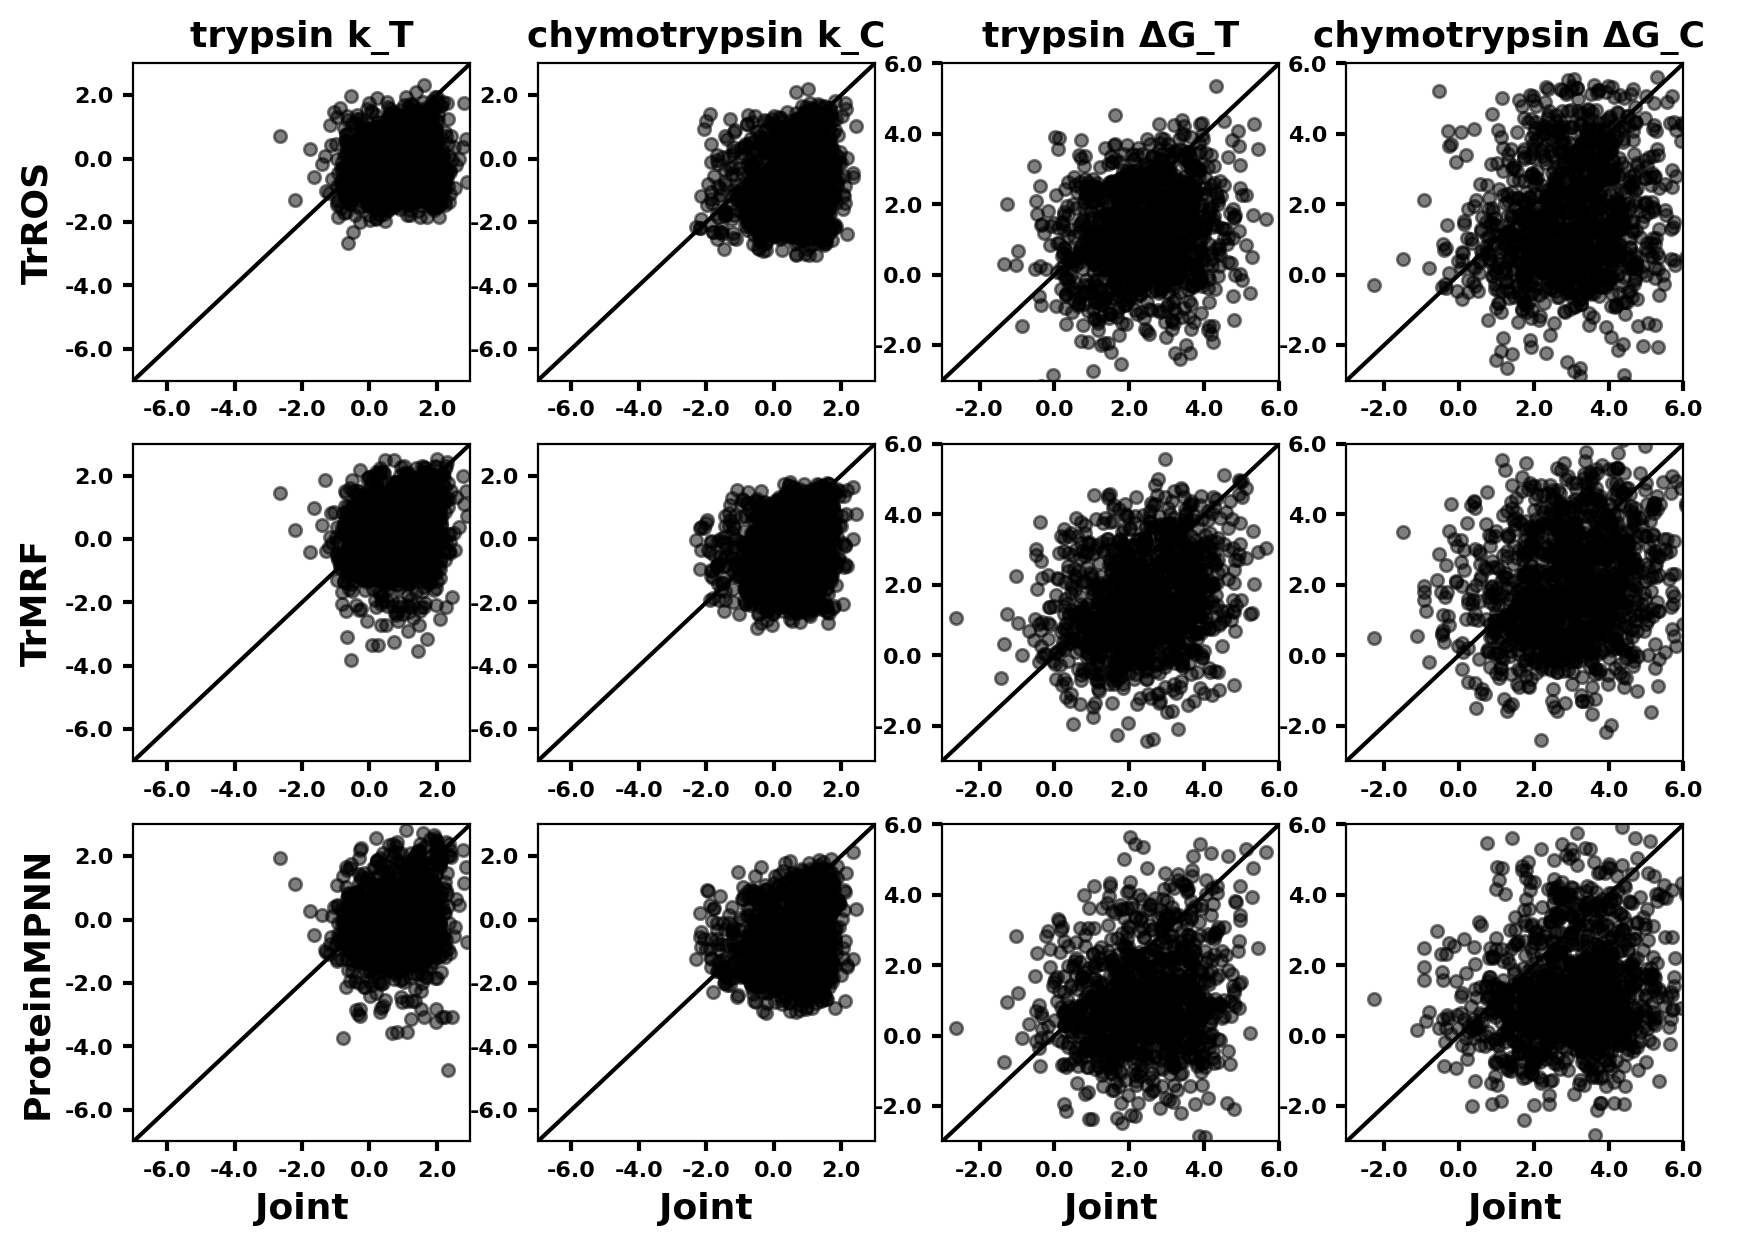

In [186]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 4, figsize=(10, 7), dpi=200, constrained_layout={'w_pad': 10, 'h_pad': 10})

plt.subplot(3,4,1)
plt.title("trypsin k_T", fontsize= 13, weight='bold')
plt.scatter(_TrROS_TrMRF[:,0],_TrROS[:,0], color="black", alpha=0.5, s=20)
plt.xlim(-7,3);plt.ylim(-7,3);plt.ylabel("TrROS", fontsize= 13, weight='bold');plt.plot([-7,3],[-7,3],color="black")
plt.subplot(3,4,2)
plt.title("chymotrypsin k_C", fontsize= 13, weight='bold')
plt.scatter(_TrROS_TrMRF[:,1],_TrROS[:,1], color="black", alpha=0.5, s=20)
plt.xlim(-7,3);plt.ylim(-7,3);plt.plot([-7,3],[-7,3],color="black")
plt.subplot(3,4,3)
plt.title("trypsin ΔG_T", fontsize= 13, weight='bold')
plt.scatter(_TrROS_TrMRF[:,2],_TrROS[:,2], color="black", alpha=0.5, s=20)
plt.xlim(-3,6);plt.ylim(-3, 6);plt.plot([-3,6],[-3,6],color="black")
plt.subplot(3,4,4)
plt.title("chymotrypsin ΔG_C ", fontsize= 13, weight='bold')
plt.scatter(_TrROS_TrMRF[:,3],_TrROS[:,3], color="black", alpha=0.5, s=20)
plt.xlim(-3,6);plt.ylim(-3, 6);plt.plot([-3,6],[-3,6],color="black")
# last_subplot = plt.subplot(3,5,5)
# plt.title("ΔG" , fontsize= 13, weight='bold')
# divider = make_axes_locatable(last_subplot)
# cax = divider.append_axes("right", size="5%", pad=0.1)
# scatter = last_subplot.scatter(_TrROS_TrMRF[:, 4], _TrROS[:, 4], c=_TrROS_TrMRF[:, 5] - _TrROS[:, 5], cmap='bwr', alpha=0.7, vmin=-30, vmax=30, s=25)
# last_subplot.set_xlim(-10, 10)
# last_subplot.set_ylim(-10, 10)
# last_subplot.plot([-10, 10], [-10, 10], color="black")
# cbar = plt.colorbar(scatter, cax=cax)


plt.subplot(3,4,5)
plt.scatter(_TrROS_TrMRF[:,0],_TrMRF[:,0], color="black", alpha=0.5, s=20)
plt.xlim(-7,3);plt.ylim(-7,3);plt.ylabel("TrMRF", fontsize= 13, weight='bold');plt.plot([-7,3],[-7,3],color="black")
plt.subplot(3,4,6)
plt.scatter(_TrROS_TrMRF[:,1],_TrMRF[:,1], color="black", alpha=0.5,s=20)
plt.xlim(-7,3);plt.ylim(-7,3);plt.plot([-7,3],[-7,3],color="black")

plt.subplot(3,4,7)
plt.scatter(_TrROS_TrMRF[:,2],_TrMRF[:,2], color="black", alpha=0.5,s=20)
plt.xlim(-3,6);plt.ylim(-3, 6);plt.plot([-3,6],[-3,6],color="black")
plt.subplot(3,4,8)
plt.scatter(_TrROS_TrMRF[:,3],_TrMRF[:,3], color="black", alpha=0.5,s=20)
plt.xlim(-3,6);plt.ylim(-3, 6);plt.plot([-3,6],[-3,6],color="black")

# last_subplot = plt.subplot(3,5,10)
# divider = make_axes_locatable(last_subplot)
# cax = divider.append_axes("right", size="5%", pad=0.1)
# scatter= last_subplot.scatter(_TrROS_TrMRF[:, 4], _TrMRF[:, 4], c=_TrROS_TrMRF[:, 5] - _TrMRF[:, 5], cmap='bwr', alpha=0.7, vmin=-30, vmax=30, s=25)
# last_subplot.set_xlim(-10, 10)
# last_subplot.set_ylim(-10, 10)
# last_subplot.plot([-10, 10], [-10, 10], color="black")
# cbar = plt.colorbar(scatter, cax=cax)


plt.subplot(3,4,9)
plt.scatter(_TrROS_TrMRF[:,0],_MPNN[:,0], color="black", alpha=0.5 ,s=20)
plt.xlim(-7,3);plt.ylim(-7,3);plt.xlabel("Joint", fontsize= 13, weight='bold');plt.ylabel("ProteinMPNN", fontsize= 13, weight='bold');plt.plot([-7,3],[-7,3],color="black")
plt.subplot(3,4,10)
plt.scatter(_TrROS_TrMRF[:,1],_MPNN[:,1], color="black", alpha=0.5, s=20)
plt.xlim(-7,3);plt.ylim(-7,3);plt.xlabel("Joint", fontsize= 13, weight='bold');plt.plot([-7,3],[-7,3],color="black")
plt.subplot(3,4,11)
plt.scatter(_TrROS_TrMRF[:,2],_MPNN[:,2], color="black", alpha=0.5 , s=20)
plt.xlim(-3,6);plt.ylim(-3, 6);plt.xlabel("Joint", fontsize= 13, weight='bold');plt.plot([-3,6],[-3,6],color="black")
plt.subplot(3,4,12)
plt.scatter(_TrROS_TrMRF[:,3],_MPNN[:,3], color="black", alpha=0.5 , s=20)
plt.xlim(-3,6);plt.ylim(-3, 6);plt.xlabel("Joint", fontsize= 13, weight='bold');plt.plot([-3,6],[-3,6],color="black")

# last_subplot = plt.subplot(3, 5, 15)
# divider = make_axes_locatable(last_subplot)
# cax = divider.append_axes("right", size="5%", pad=0.1)
# scatter = last_subplot.scatter(_TrROS_TrMRF[:, 4], _MPNN[:, 4], c=_TrROS_TrMRF[:, 5] - _MPNN[:, 5], cmap='bwr', alpha=0.7, vmin=-30, vmax=30, s=25)
# last_subplot.set_xlim(-10, 10)
# last_subplot.set_ylim(-10, 10)
# last_subplot.plot([-10, 10], [-10, 10], color="black")
# last_subplot.set_xlabel("Joint", fontsize= 13, weight='bold')
# cbar = plt.colorbar(scatter, cax=cax)

for ax in fig.get_axes():
    ax.tick_params(axis='both', which='both', labelsize=8, width=1.5)  # Increase fontsize and tick width
    ax.set_xticklabels(ax.get_xticks(), fontweight='bold')  # Set x tick labels to bold
    ax.set_yticklabels(ax.get_yticks(), fontweight='bold')  # Set y tick labels to bold
# plt.tight_layout()
# plt.savefig('final_paper_figures/joint_model_vs_others_experiment_evaluation.png', dpi =300)

plt.show()

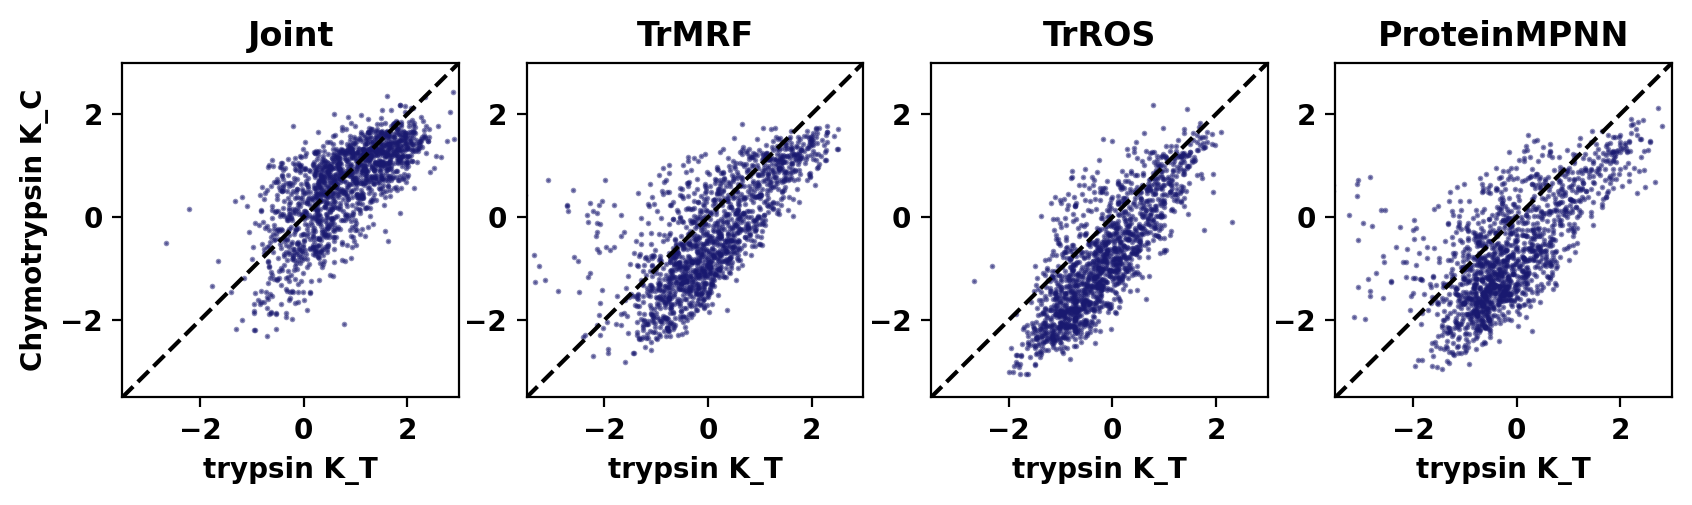

In [187]:
plt.figure(figsize=(10,10),dpi=200)

plt.subplot(4,4,1)
plt.title("Joint", fontsize= 12, weight= 'bold')
plt.scatter(_TrROS_TrMRF[:,0],_TrROS_TrMRF[:,1], color="midnightblue", alpha=0.5, s=1)
plt.xlim(-3.5,3);plt.ylim(-3.5,3);plt.plot([-3.5,3],[-3.5,3],color="black", linestyle='--')
plt.xticks(fontweight='bold')  # Set x tick labels to bold
plt.xlabel('trypsin K_T', weight='bold')
plt.ylabel('Chymotrypsin K_C', weight='bold')
plt.yticks(fontweight='bold')  # Set x tick labels to bold

plt.subplot(4,4,2)
plt.title("TrMRF", fontsize= 12, weight= 'bold')
plt.scatter(_TrMRF[:,0],_TrMRF[:,1], color="midnightblue", alpha=0.5, s=1)
plt.xlim(-3.5,3);plt.ylim(-3.5,3);plt.plot([-3.5,3],[-3.5,3],color="black", linestyle='--')
plt.xlabel('trypsin K_T', weight='bold')
plt.xticks(fontweight='bold')  # Set x tick labels to bold
plt.yticks(fontweight='bold')  # Set x tick labels to bold

plt.subplot(4,4,3)
plt.title("TrROS", fontsize= 12, weight= 'bold')
plt.scatter(_TrROS[:,0],_TrROS[:,1], color="midnightblue", alpha=0.5, s=1)
plt.xlim(-3.5,3);plt.ylim(-3.5,3);plt.plot([-3.5,3],[-3.5,3],color="black", linestyle='--')
plt.xlabel('trypsin K_T', weight='bold')
plt.xticks(fontweight='bold')  # Set x tick labels to bold
plt.yticks(fontweight='bold')  # Set x tick labels to bold

plt.subplot(4,4,4)
plt.title("ProteinMPNN", fontsize= 12, weight= 'bold')
plt.scatter(_MPNN[:,0],_MPNN[:,1], color="midnightblue", alpha=0.5, s=1)
plt.xlim(-3.5,3);plt.ylim(-3.5,3);plt.plot([-3.5,3],[-3.5,3],color="black", linestyle='--')
plt.xlabel('trypsin K_T', weight='bold')
plt.xticks(fontweight='bold')  # Set x tick labels to bold
plt.yticks(fontweight='bold')  # Set x tick labels to bold

plt.savefig('final_figures_all_4/kc_vs_kt_evaluation.png', dpi= 300)

plt.show()

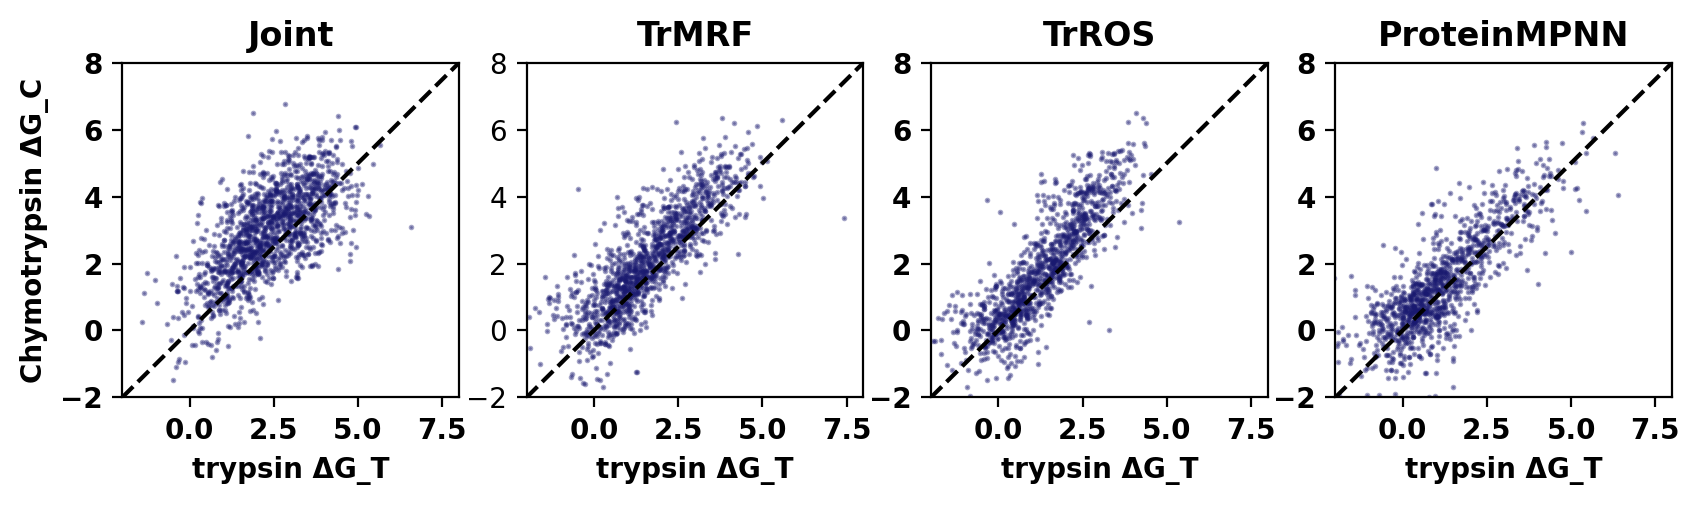

In [188]:
plt.figure(figsize=(10,10),dpi=200)

plt.subplot(4,4,1)
plt.title("Joint", fontsize= 12, weight= 'bold')
plt.scatter(_TrROS_TrMRF[:,2],_TrROS_TrMRF[:,3], color="midnightblue", alpha=0.4, s=1)
plt.xlim(-2,8);plt.ylim(-2,8);plt.xlabel("Joint");plt.plot([-2,8],[-2,8],color="black", linestyle='--')
plt.xticks(fontweight='bold')  # Set x tick labels to bold
plt.yticks(fontweight='bold')  # Set x tick labels to bold
plt.xlabel('trypsin ΔG_T', weight='bold')
plt.ylabel('Chymotrypsin ΔG_C', weight='bold')

plt.subplot(4,4,2)
plt.title("TrMRF", fontsize= 12, weight= 'bold')
plt.scatter(_TrMRF[:,2],_TrMRF[:,3], color="midnightblue", alpha=0.4, s=1)
plt.xlim(-2,8);plt.ylim(-2,8);plt.xlabel("TrMRF");plt.plot([-2,8],[-2,8],color="black", linestyle='--')
plt.xticks(fontweight='bold')  # Set x tick labels to bold
plt.xlabel('trypsin ΔG_T', weight='bold')
plt.subplot(4,4,3)
plt.title("TrROS", fontsize= 12, weight= 'bold')
plt.scatter(_TrROS[:,2],_TrROS[:,3], color="midnightblue", alpha=0.4, s=1)
plt.xlim(-2,8);plt.ylim(-2,8);plt.xlabel("TrROS");plt.plot([-2,8],[-2,8],color="black", linestyle='--')
plt.xticks(fontweight='bold')  # Set x tick labels to bold
plt.yticks(fontweight='bold')  # Set x tick labels to bold
plt.xlabel('trypsin ΔG_T', weight='bold')
plt.subplot(4,4,4)
plt.title("ProteinMPNN", fontsize= 12, weight= 'bold')
plt.scatter(_MPNN[:,2],_MPNN[:,3], color="midnightblue", alpha=0.4, s=1)
plt.xlim(-2,8);plt.ylim(-2,8);plt.xlabel("MPNN");plt.plot([-2,8],[-2,8],color="black", linestyle='--')
plt.xticks(fontweight='bold')  # Set x tick labels to bold
plt.yticks(fontweight='bold')  # Set x tick labels to bold
plt.xlabel('trypsin ΔG_T', weight='bold')
plt.savefig('final_figures_all_4/Gc_vs_Gt_evaluation.png', dpi=300)

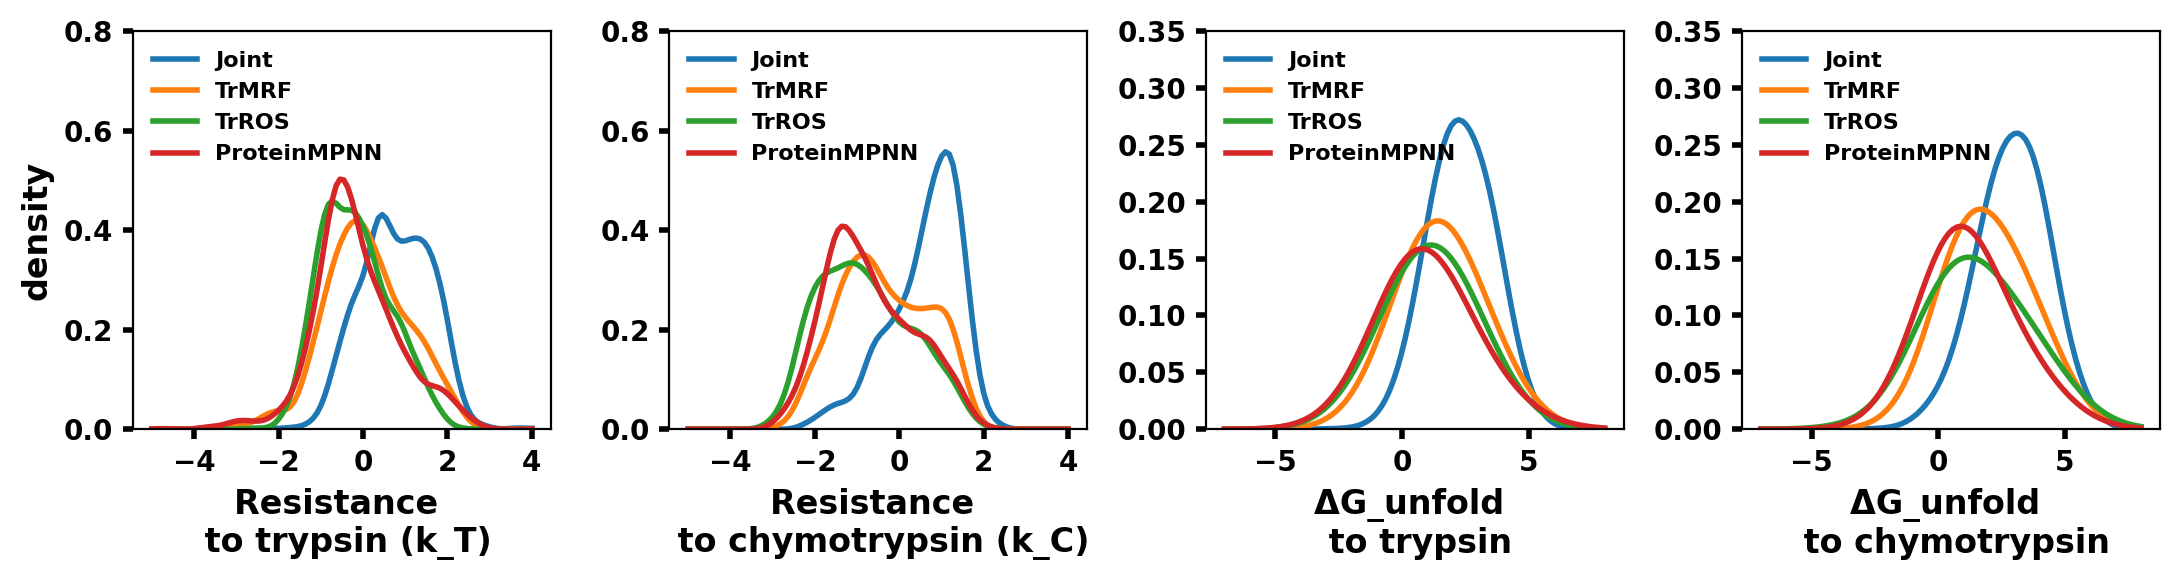

In [189]:

plt.figure(figsize=(11,3),dpi=200)
r = np.linspace(0,40,100)

plddt_cutoff = 70
inter_pae_cutoff = 15
r = np.linspace(-5,4,100)
plt.subplot(1,4,1)
plt.plot(r,stats.gaussian_kde(_TrROS_TrMRF[:, 0])(r),label="Joint", linewidth=2) 
plt.plot(r,stats.gaussian_kde(_TrMRF[:, 0])(r),label="TrMRF", linewidth=2) 
plt.plot(r,stats.gaussian_kde(_TrROS[:, 0])(r),label="TrROS", linewidth=2) 
plt.plot(r,stats.gaussian_kde(_MPNN[:, 0])(r),label="ProteinMPNN", linewidth=2) 
# plt.plot([-2,-2],[0,0.6],color="black")
plt.legend(frameon=False, fontsize= 12, prop={'size':8,'weight':'bold'}, loc='upper left')
plt.xlabel("Resistance \n to trypsin (k_T)", fontsize= 12, weight='bold')
plt.ylabel("density", fontsize= 12, weight='bold')
plt.ylim(0,0.8)
plt.tick_params(axis='both', which='both', labelsize=10, width=2)  # Increase fontsize and tick width
plt.xticks(fontweight='bold')  # Set x tick labels to bold
plt.yticks(fontweight='bold')  # Set x tick labels to bold


plt.subplot(1,4,2)
plt.plot(r,stats.gaussian_kde(_TrROS_TrMRF[:, 1])(r),label="Joint", linewidth=2) 
plt.plot(r,stats.gaussian_kde(_TrMRF[:, 1])(r),label="TrMRF", linewidth=2) 
plt.plot(r,stats.gaussian_kde(_TrROS[:, 1])(r),label="TrROS", linewidth=2) 
plt.plot(r,stats.gaussian_kde(_MPNN[:, 1])(r),label="ProteinMPNN", linewidth=2) 
# plt.plot([-1,-1],[0,0.56],color="black")
plt.legend(frameon=False, fontsize= 12, prop={'size':8,'weight':'bold'}, loc='upper left')
plt.xlabel("Resistance \n to chymotrypsin (k_C)", fontsize= 12, weight='bold')
plt.ylim(0,0.8)
plt.tick_params(axis='both', which='both', labelsize=10, width=2)  # Increase fontsize and tick width
plt.xticks(fontweight='bold')  # Set x tick labels to bold
plt.yticks(fontweight='bold')  # Set x tick labels to bold


r = np.linspace(-7, 8, 100)


# Subplot 1
plt.subplot(1, 4, 3)
plt.plot(r, stats.gaussian_kde(_TrROS_TrMRF[:, 2])(r), label="Joint", linewidth=2) 
plt.plot(r, stats.gaussian_kde(_TrMRF[:, 2])(r), label="TrMRF", linewidth=2) 
plt.plot(r, stats.gaussian_kde(_TrROS[:, 2])(r), label="TrROS", linewidth=2) 
plt.plot(r, stats.gaussian_kde(_MPNN[:, 2])(r), label="ProteinMPNN", linewidth=2) 
plt.legend(frameon=False, fontsize= 12, prop={'size':8,'weight':'bold'}, loc='upper left')
plt.xlabel("ΔG_unfold \n to trypsin", fontsize= 12, weight='bold')
# plt.ylabel("density", fontsize= 12, weight='bold')
plt.ylim(0, 0.35)
plt.tick_params(axis='both', which='both', labelsize=10, width=2)  # Increase fontsize and tick width
plt.xticks(fontweight='bold')  # Set x tick labels to bold
plt.yticks(fontweight='bold')  # Set x tick labels to bold


# Subplot 2
plt.subplot(1, 4, 4)
plt.plot(r, stats.gaussian_kde(_TrROS_TrMRF[:, 3])(r), label="Joint", linewidth=2) 
plt.plot(r, stats.gaussian_kde(_TrMRF[:, 3])(r), label="TrMRF", linewidth=2)
plt.plot(r, stats.gaussian_kde(_TrROS[:,3])(r), label="TrROS", linewidth=2) 
plt.plot(r, stats.gaussian_kde(_MPNN[:, 3])(r), label="ProteinMPNN", linewidth=2) 
plt.legend(frameon=False, fontsize= 12, prop={'size':8,'weight':'bold'}, loc='upper left')
plt.xlabel("ΔG_unfold \n to chymotrypsin", fontsize= 12, weight='bold')
plt.ylim(0, 0.35)
plt.tick_params(axis='both', which='both', labelsize=10, width=2)  # Increase fontsize and tick width
plt.xticks(fontweight='bold')  # Set x tick labels to bold
plt.yticks(fontweight='bold')  # Set x tick labels to bold


plt.tight_layout()
plt.savefig('final_figures_all_4/k_and_G.png', dpi =300)
plt.show()

In [190]:
len(filtered_TrROS)

1167

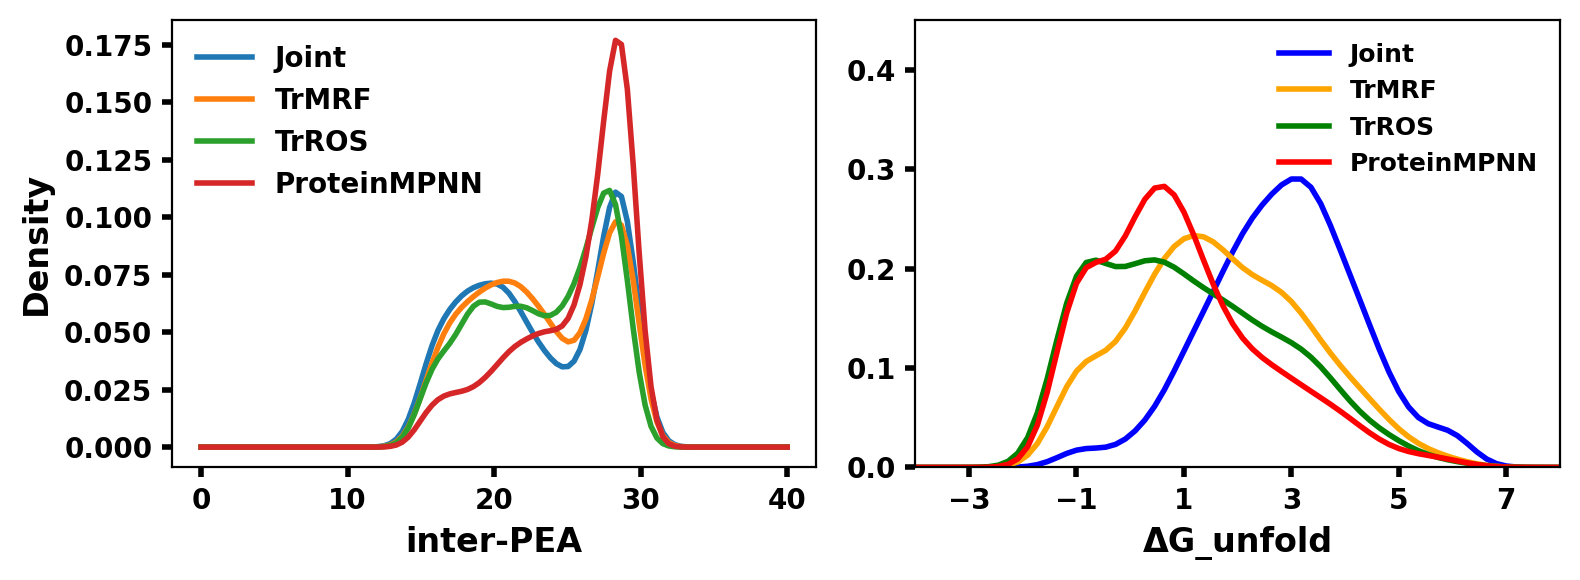

In [221]:

plt.figure(figsize=(8,3),dpi=200)
r = np.linspace(0,40,100)
plt.subplot(1,2,1)
plt.plot(r,stats.gaussian_kde(_TrROS_TrMRF[:,-2])(r),label="Joint", linewidth=2) 
plt.plot(r,stats.gaussian_kde(_TrMRF[:,-2])(r),label="TrMRF", linewidth=2) 
plt.plot(r,stats.gaussian_kde(_TrROS[:,-2])(r),label="TrROS", linewidth=2) 
plt.plot(r,stats.gaussian_kde(_MPNN[:,-2])(r),label="ProteinMPNN", linewidth=2) 
#plt.plot([20,20],[0,0.07],color="black")
plt.legend(frameon=False, fontsize= 16, prop={'weight':'bold'}, loc='upper left')
plt.xlabel("inter-PEA", fontsize= 12, weight='bold')
plt.ylabel("Density", fontsize= 12, weight='bold')
plt.tick_params(axis='both', which='both', labelsize=10, width=2)  # Increase fontsize and tick width
plt.xticks(fontweight='bold')  # Set x tick labels to bold
plt.yticks(fontweight='bold')  # Set x tick labels to bold

r = np.linspace(-9, 9, 100)

bandwidth_adjust = 0.3
plt.subplot(1, 2, 2)
plt.plot(r, stats.gaussian_kde(_TrROS_TrMRF[:, 4], bw_method=bandwidth_adjust)(r), 
         label="Joint", linewidth=2, color='blue')
plt.plot(r, stats.gaussian_kde(_TrMRF[:, 4], bw_method=bandwidth_adjust)(r), 
         label="TrMRF", linewidth=2, color='orange')
plt.plot(r, stats.gaussian_kde(_TrROS[:, 4], bw_method=bandwidth_adjust)(r), 
         label="TrROS", linewidth=2, color='green')
plt.plot(r, stats.gaussian_kde(_MPNN[:, 4], bw_method=bandwidth_adjust)(r), 
         label="ProteinMPNN", linewidth=2, color='red')
plt.legend(frameon=False,  prop={'size':9,'weight':'bold'}, loc='upper right')
plt.xlabel("ΔG_unfold", fontsize= 12, weight='bold')
plt.ylim(0, 0.45)
plt.xlim(-4,8)
plt.xticks(np.arange(-3, 8, 2))
plt.tick_params(axis='both', which='both', labelsize=10, width=2)  # Increase fontsize and tick width
plt.xticks(fontweight='bold')  # Set x tick labels to bold
plt.yticks(fontweight='bold')  # Set x tick labels to bold
plt.tight_layout()

plt.savefig('final_figures_all_4/inter_pae_dG.png', dpi =300)